Here I construct the initial force field Lenard-Jone potential and Coulume potential from UFF and MIL-120 from aiida-plugin

The force field file in RASPA: epsilon units (Kelvin); sigma(Angstrom)

Al_     LENNARD_JONES   254.152 4.0082
C_      LENNARD_JONES   52.8435 3.4309
H_      LENNARD_JONES   22.1439 2.5711
O_      LENNARD_JONES   30.1963 3.1181
O_co2   LENNARD_JONES   79.0    3.05
C_co2   LENNARD_JONES   27.0    2.80

The force field file in OpenMM: epsilon units (KJ/mol); sigma(nm)

Al_     LENNARD_JONES   2.1019    0.40082
C_      LENNARD_JONES   0.4400    0.34309
H_      LENNARD_JONES   0.1841    0.25711
O_      LENNARD_JONES   0.2513    0.31181
O_co2   LENNARD_JONES   0.6577    0.30500
C_co2   LENNARD_JONES   0.2249    0.28000

Some prepared files to run the simulation: (I put all of them in data directory)


It is not easy to generate these files. Bullshit PDB and xml files. I save some childish methods in refine.ipynb to do it. 
If I have time, maybe write new functions to unils.py

Structural file of MOF: 
atoms in pdb file should have a special name

gas.pdb: CO2 molecule predicted by UFF force field
MIL-120.pdb: The rigid framework

A good force field:
custom_force_field.xml, containing charges information from CIF file

In [1]:
import numpy as np
transfer_unit = 503.2227
ls = [0.0, 0.105, 0.044, 0.06,0.15998,0.05590]
print(np.array(ls)*transfer_unit)

[ 0.         52.8383835  22.1417988  30.193362   80.50556755 28.13014893]


In [1]:
ls = [254.152, 52.8435, 22.1439, 30.1963]
print([i*0.6 for i in ls])

[152.4912, 31.7061, 13.28634, 18.11778]


In [2]:
import os
dest_path = "/home/yutao/project/MIL-120/traj/"
traj_ls = os.listdir(dest_path)
pdb_file = os.path.join(dest_path, traj_ls[0])

In [11]:
Transfer_energy_unit = 254.152/2.11525
kcal_to_kj = 4.184
print(0.0673*kcal_to_kj*Transfer_energy_unit)
print(0.0692*kcal_to_kj*Transfer_energy_unit)
print(0.0692*kcal_to_kj)
print(0.0950*kcal_to_kj*Transfer_energy_unit)
print(0.105*kcal_to_kj*Transfer_energy_unit)

33.83284881049521
34.788010961162975
0.2895328
47.75810753338848
52.78527674742938


In [5]:
3.8050/(2**(1/6))

3.389869622523991

In [4]:
import json
Transfer_energy_unit = 254.152/2.11525
Transfer_length_unit = 10
def show_ff(file_path='/home/yutao/project/aiida/applications/ff_1.json'):
    global Transfer_energy_unit, Transfer_length_unit
    element_list = ['Al_', 'C_', 'H_', 'O_']
    ff_data = json.load(open(file_path))

    for idx in range(len(element_list)):
        print(ff_data[element_list[idx]][0],ff_data[element_list[idx]][1]/Transfer_energy_unit,ff_data[element_list[idx]][2]/Transfer_length_unit)
show_ff('/home/yutao/project/aiida/applications/ff_2.json')

lennard-jones 1.7812011029376433 0.40082000000000007
lennard-jones 0.2601128077574232 0.34309
lennard-jones 0.2583417020693716 0.25711
lennard-jones 0.15013778874276226 0.31181


In [3]:
import os
import numpy as np
from utils import scaling_gas, extract_from_raspa
dest_path = "/home/yutao/project/MIL-120/traj/"
traj_ls = os.listdir(dest_path)
#print(traj_ls)
print(-(traj_ls))

TypeError: bad operand type for unary -: 'list'

In [3]:
from ase.io import read, write
atoms = read("/home/yutao/project/github/DMFF/UFF_opt/aiida-pos-1.xyz","-1::")

In [7]:
print(atoms)
import numpy as np
# Set the cell parameters
cell_parameters = np.array([[9.866, 0.0, 0.0],
                            [0.0, 9.866, 0.0],
                            [0.0, 0.0, 9.866]])

atoms[0].set_cell(cell_parameters)

[Atoms(symbols='H64O32', pbc=False)]


In [8]:
write("/home/yutao/project/water.cif",atoms)

In [4]:
import os
import numpy as np
from utils import scaling_gas,extract_from_raspa
dest_path = "/home/yutao/project/MIL-120/traj/"
traj_ls = os.listdir(dest_path)

for jdx, traj in enumerate(extract_from_raspa(traj_ls)):
    if 'Movie_framework' not in traj[1]:
        continue
    pdb_file = os.path.join(dest_path,traj[1])
    # extract coordination C-CO2 atoms
    directory = f"./traj/{jdx+1}"
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Directory created:", directory)
    with open(pdb_file) as f:
        lines = f.readlines()
    coords_ls = []
    symb_ls = []
    index = 0
    for i, line in enumerate(lines):
        if line.startswith("MODEL"):
            if index:
                scaling_gas(block_coords,"data/gas.pdb",index,dest_path=directory)
            print(len(block_coords))
            block_coords = []
            block_Csym = []
            index += 1
        if line.startswith("ATOM"):
            parts = line.split()
            coords = np.array([float(parts[4]), float(parts[5]), float(parts[6])])
            block_coords.append(coords)
            block_Csym.append(parts[-1])

NameError: name 'block_coords' is not defined

In [5]:
import os
import numpy as np
from utils import scaling_gas, extract_from_raspa

dest_path = "/home/yutao/project/MIL-120/traj/"
traj_ls = os.listdir(dest_path)

num_atoms_list = []  # List to store the number of atoms in each structure

for jdx, traj in enumerate(extract_from_raspa(traj_ls)):
    if 'Movie_framework' not in traj[1]:
        continue
    pdb_file = os.path.join(dest_path, traj[1])
    # extract coordination C-CO2 atoms
    directory = f"./traj/{jdx+1}"
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Directory created:", directory)
    with open(pdb_file) as f:
        lines = f.readlines()
    coords_ls = []
    symb_ls = []
    index = 0
    num_atoms = 0  # Variable to store the number of atoms in the current structure
    for i, line in enumerate(lines):
        if line.startswith("MODEL"):
            if index:
                scaling_gas(block_coords, "data/gas.pdb", index, dest_path=directory)
            print(len(block_coords))
            block_coords = []
            block_Csym = []
            index += 1
            num_atoms_list.append(num_atoms)  # Add the number of atoms to the list
            num_atoms = 0  # Reset the number of atoms for the next structure
        if line.startswith("ATOM"):
            parts = line.split()
            coords = np.array([float(parts[4]), float(parts[5]), float(parts[6])])
            block_coords.append(coords)
            block_Csym.append(parts[-1])
            num_atoms += 1  # Increment the number of atoms
    num_atoms_list.append(num_atoms)  # Add the number of atoms for the last structure

print("Number of atoms in each structure:", num_atoms_list)

NameError: name 'block_coords' is not defined

In [6]:
import os
import numpy as np
from utils import scaling_gas, extract_from_raspa
bar = 10**5
dest_path = "/home/yutao/project/MIL-120/traj/"
traj_ls = os.listdir(dest_path)

isotherm_data = [[],[]] # the first list is for pressure, the second is for loading

for jdx, traj in enumerate(extract_from_raspa(traj_ls)):
    
    pdb_file = traj[1]
    if not pdb_file.endswith(".pdb") or 'Movie_framework' not in pdb_file:
        continue
    isotherm_data[0].append(float(traj[0])/bar)
    pdb_path = os.path.join(dest_path, pdb_file)
    with open(pdb_path) as f:
        lines = f.readlines()
    num_atoms_list = []  # List to store the number of atoms in each structure
    index = 0
    num_atoms = 0  # Variable to store the number of atoms in the current structure
    for line in lines:
        if line.startswith("MODEL"):
            if index:
                scaling_gas(block_coords, "data/gas.pdb", index, dest_path=directory)
            block_coords = []
            block_Csym = []
            index += 1
            num_atoms_list.append(num_atoms)  # Add the number of atoms to the list
            num_atoms = 0  # Reset the number of atoms for the next structure
        if line.startswith("ATOM"):
            parts = line.split()
            coords = np.array([float(parts[4]), float(parts[5]), float(parts[6])])
            block_coords.append(coords)
            block_Csym.append(parts[-1])
            num_atoms += 1  # Increment the number of atoms
    num_atoms_list.append(num_atoms)  # Add the number of atoms for the last structure
    num_atoms_list = num_atoms_list[15:]
    isotherm_data[1].append(sum(num_atoms_list)/len(num_atoms_list)/3/3/2/3)
    print("Number of atoms in each structure for", pdb_file, ":", num_atoms_list)

Number of atoms in each structure for Movie_framework_1_3.3.2_303.000000_2164.887307_component_CO2_0.pdb : [114, 108, 111, 111, 111, 111, 120, 114, 108, 111, 111, 111, 111, 111, 108, 108, 108, 108, 105, 108, 114, 111, 111, 111, 114, 111, 111, 111, 114, 114, 108, 111, 108, 108, 114, 108]
Number of atoms in each structure for Movie_framework_1_3.3.2_303.000000_3825.622776_component_CO2_0.pdb : [108, 102, 111, 105, 114, 111, 111, 111, 105, 108, 111, 117, 111, 111, 114, 111, 111, 114, 114, 114, 111, 120, 123, 114, 105, 114, 111, 108, 102, 111, 111, 108, 111, 102, 114, 111]
Number of atoms in each structure for Movie_framework_1_3.3.2_303.000000_5901.542112_component_CO2_0.pdb : [114, 114, 123, 117, 117, 120, 111, 114, 108, 108, 114, 114, 117, 120, 111, 120, 114, 108, 111, 114, 123, 117, 108, 108, 108, 111, 108, 111, 108, 108, 111, 111, 111, 111, 114, 111]
Number of atoms in each structure for Movie_framework_1_3.3.2_303.000000_7769.869514_component_CO2_0.pdb : [117, 117, 114, 114, 111, 108

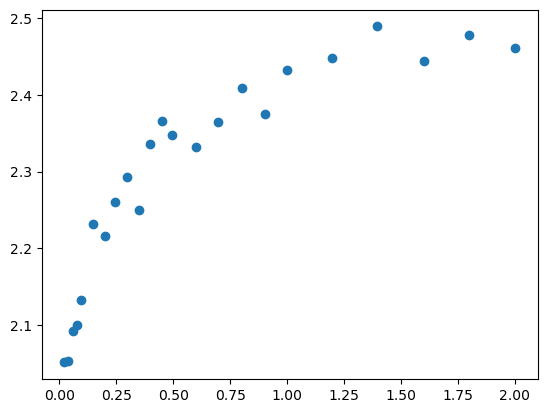

In [7]:
import matplotlib.pyplot as plt
plt.plot(isotherm_data[0], isotherm_data[1], 'o')

In [8]:
raspa_isotherm = dict({
    "loading_absolute_average": [
            4.1475461760433,
            4.1682795780048,
            4.2119051746019,
            4.2857088897951,
            4.3472569607212,
            4.4867689199957,
            4.4830809830163,
            4.5825316016782,
            4.6522988251158,
            4.5864669004446,
            4.751951830768,
            4.7789817105534,
            4.716635336276,
            4.7685250597767,
            4.747937826006,
            4.8892825099698,
            4.8383709892099,
            4.9311765750692,
            4.9275111254882,
            5.0058460562137,
            5.0193160212084,
            5.0315604218775,
            5.0003816129398
        ],
        "loading_absolute_unit": "mol/kg",
        "pressure": [
            0.021648873072361,
            0.038256227758007,
            0.059015421115065,
            0.077698695136418,
            0.09638196915777,
            0.14827995255042,
            0.20017793594306,
            0.24584816132859,
            0.29774614472123,
            0.34756820877817,
            0.39739027283511,
            0.44928825622776,
            0.49495848161329,
            0.60083036773428,
            0.69839857651246,
            0.80219454329775,
            0.90183867141163,
            0.99733096085409,
            1.1986951364176,
            1.3959074733096,
            1.5993475682088,
            1.7986358244365,
            2.0020759193357
        ],
})

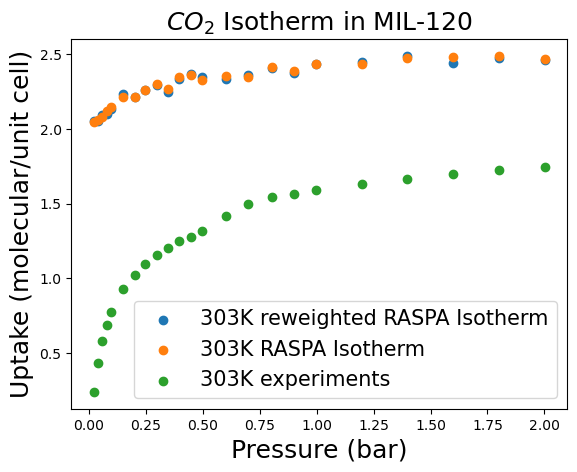

In [9]:
Transfer_unit = 2.7719416667/5.6100437023
fz = 18
plt.scatter(isotherm_data[0], isotherm_data[1], label = r"303K reweighted RASPA Isotherm")
plt.scatter(raspa_isotherm["pressure"], np.array(raspa_isotherm["loading_absolute_average"])*Transfer_unit, label = r"303K RASPA Isotherm")
arr_3 = np.loadtxt("/home/yutao/dataset/exp_303.txt", delimiter=',')
plt.scatter(arr_3[:,0], Transfer_unit*arr_3[:,1], label = r"303K experiments")

plt.title(r"$CO_{2}$ Isotherm in MIL-120",fontsize=fz)
plt.xlabel("Pressure (bar)", fontsize=fz)
plt.ylabel("Uptake (molecular/unit cell)", fontsize=fz)
plt.legend(fontsize=fz-3)

In [10]:
Transfer_unit*arr_3[:,1]

array([0.24030165, 0.43200297, 0.58320401, 0.69120476, 0.77760535,
       0.93150641, 1.02600706, 1.09620754, 1.15560795, 1.2069083 ,
       1.24740858, 1.27710879, 1.31490905, 1.42020977, 1.50121033,
       1.54171061, 1.56601078, 1.59301096, 1.63351124, 1.66591146,
       1.69831169, 1.72531187, 1.74691202])

In [11]:
extract_from_raspa(traj_ls)

[(2164.887307,
  'Movie_framework_1_3.3.2_303.000000_2164.887307_component_CO2_0.pdb'),
 (3825.622776,
  'Movie_framework_1_3.3.2_303.000000_3825.622776_component_CO2_0.pdb'),
 (5901.542112,
  'Movie_framework_1_3.3.2_303.000000_5901.542112_component_CO2_0.pdb'),
 (7769.869514,
  'Movie_framework_1_3.3.2_303.000000_7769.869514_component_CO2_0.pdb'),
 (9638.196916,
  'Movie_framework_1_3.3.2_303.000000_9638.196916_component_CO2_0.pdb'),
 (14827.995255,
  'Movie_framework_1_3.3.2_303.000000_14827.995255_component_CO2_0.pdb'),
 (18172.1,
  '.~lock.Movie_framework_1_3.3.2_303.000000_18172.100000_component_CO2_0.pdb#'),
 (20017.793594,
  'Movie_framework_1_3.3.2_303.000000_20017.793594_component_CO2_0.pdb'),
 (24584.816133,
  'Movie_framework_1_3.3.2_303.000000_24584.816133_component_CO2_0.pdb'),
 (29774.614472,
  'Movie_framework_1_3.3.2_303.000000_29774.614472_component_CO2_0.pdb'),
 (34756.820878,
  'Movie_framework_1_3.3.2_303.000000_34756.820878_component_CO2_0.pdb'),
 (39739.027284,
 

In [12]:
for jdx in range(len(traj_ls)):
    print(jdx)
    directory = f"./traj/{jdx+1}"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [13]:
pdb_file = 1.pdb_file
path = os.path(directory+pdb_file)


SyntaxError: invalid decimal literal (1949319570.py, line 1)

In [14]:
1.0 / 8.314 * 1000.0

120.27904738994468

In [15]:

# extract coordination C-CO2 atoms
with open(pdb_file) as f:
    lines = f.readlines()
coords_ls = []
symb_ls = []
for i, line in enumerate(lines):
    if line.startswith("MODEL"):
        block_coords = []
        block_Csym = []
    if line.startswith("ATOM"):
        parts = line.split()
        coords = np.array([float(parts[4]), float(parts[5]), float(parts[6])])
        block_coords.append(coords)
        block_Csym.append(parts[-1])

FileNotFoundError: [Errno 2] No such file or directory: 'Movie_framework_1_3.3.2_303.000000_200207.591934_component_CO2_0.pdb'

In [16]:
def scaling_gas(block_coords, pdb_template, index, dest_path="./traj"):
    '''
    input:
        block_coords: coordination of CO2 atoms
        pdb: gas.pdb
        index: index of the structure in the trajectory
    '''
    num = int(len(block_coords)/3)
    pdb = app.PDBFile(pdb_template)
    original_topology = pdb.topology

    new_topology = app.Topology()
    for i in range(num):
        for chain in original_topology.chains():
            
            atom_map = {}  # Keep track of the mapping between original atoms and new atoms

            new_chain = new_topology.addChain()
            for residue in chain.residues():
                new_residue = new_topology.addResidue(residue.name, new_chain)
                for atom in residue.atoms():
                    new_atom = new_topology.addAtom(atom.name, atom.element, new_residue)
                    atom_map[atom] = new_atom
            
        for bond in original_topology.bonds():
            atom1, atom2 = bond
            if atom1 in atom_map and atom2 in atom_map:
                new_topology.addBond(atom_map[atom1], atom_map[atom2])
    app.PDBFile.writeFile(new_topology, block_coords, open(os.path.join(dest_path, f"{index}.pdb"), 'w'))

In [17]:
app.PDBFile(None, new_topology,block_coords)

NameError: name 'app' is not defined

In [18]:
for chain0 in new_topology.chains():  
            new_residue = new_topology.addResidue(residue.name, chain0)
            continue

NameError: name 'new_topology' is not defined

In [19]:
original_topology = pdb.topology

new_topology = pdb.topology#app.Topology()

for chain in original_topology.chains():
    atom_map = {}  # Keep track of the mapping between original atoms and new atoms
    for residue in chain.residues():
        for chain0 in new_topology.chains():  
            new_residue = new_topology.addResidue(residue.name, chain0)
            continue
        for atom in residue.atoms():
            #print(atom)
            new_atom = new_topology.addAtom(atom.name, atom.element, new_residue)
            atom_map[atom] = new_atom
        continue
    # Copy bonds for the unique residue type
    for bond in original_topology.bonds():
        atom1, atom2 = bond
        if atom1 in atom_map and atom2 in atom_map:
            #print(atom1,atom_map[atom1])
            #print(atom2,atom_map[atom2])
            new_topology.addBond(atom_map[atom1], atom_map[atom2])  # Add the bond to the subset topology


NameError: name 'pdb' is not defined

In [20]:
new_topology

NameError: name 'new_topology' is not defined

In [83]:
block_coords

[array([2.583, 7.516, 9.323]),
 array([ 3.268,  7.093, 10.159]),
 array([ 3.952,  6.671, 10.995]),
 array([7.199, 2.41 , 1.429]),
 array([7.32 , 1.256, 1.413]),
 array([7.442, 0.103, 1.397]),
 array([-4.128,  5.623, 11.574]),
 array([-4.13 ,  4.472, 11.426]),
 array([-4.131,  3.322, 11.278]),
 array([-0.621,  5.76 ,  1.776]),
 array([-0.741,  6.896,  1.572]),
 array([-0.862,  8.031,  1.368]),
 array([ 1.795, 10.173, 11.94 ]),
 array([ 2.328, 11.187, 11.758]),
 array([ 2.861, 12.201, 11.576]),
 array([ 6.002, 15.48 , 18.447]),
 array([ 5.803, 14.338, 18.4  ]),
 array([ 5.603, 13.197, 18.353]),
 array([ 2.157, 11.167,  8.751]),
 array([ 1.991, 12.298,  8.553]),
 array([ 1.825, 13.429,  8.354]),
 array([ 3.623, -4.988, 11.99 ]),
 array([ 4.062, -3.921, 11.866]),
 array([ 4.5  , -2.855, 11.741]),
 array([-0.353,  8.758, 18.578]),
 array([-0.528,  7.615, 18.487]),
 array([-0.704,  6.472, 18.397]),
 array([-2.326, 14.135,  1.68 ]),
 array([-1.895, 15.212,  1.674]),
 array([-1.464, 16.289,  1

In [ ]:
md.iterload(pdb_file)

In [87]:
num_co2 = len(block_Csym)/3
pdb = app.PDBFile("data/gas.pdb")*num_co2

TypeError: unsupported operand type(s) for *: 'PDBFile' and 'float'

In [88]:
app.Modeller

openmm.app.modeller.Modeller

In [26]:
# These package is inherited from Lenard-Jones optimization part of DMFF

import openmm.app as app
import openmm as mm
import openmm.unit as unit
import numpy as np
import jax
import jax.numpy as jnp
import dmff
from dmff.api.xmlio import XMLIO
from dmff.api.paramset import ParamSet
from dmff.generators.classical import CoulombGenerator, LennardJonesGenerator
from dmff.api.hamiltonian import Hamiltonian
from dmff.operators import ParmedLennardJonesOperator
from dmff import NeighborListFreud
from dmff.mbar import ReweightEstimator
import mdtraj as md
from tqdm import tqdm, trange
import parmed
import sys
import os
from dmff.api.topology import DMFFTopology
# this is a package I write to solve some IO problems utils.py
from utils import create_supercell, gas_generate,add_loading
from utils import cutoff_topology
import matplotlib.pyplot as plt
import optax

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


In [27]:
import xml.etree.ElementTree as ET
import xml.dom.minidom as minidom

def convert_dict_values_to_str(d):
    for key, value in d.items():
        d[key] = str(value)
    return d

def write_xml(ffinfo, path):
    # Create the root element
    root = ET.Element("ForceField")

    # Create the LennardJonesForce element
    lj_force = ET.SubElement(root, "LennardJonesForce")
    lj_force.set("lj14scale", "0.50000")
    # Add Atom elements for each atom
    for node in ffinfo['Forces']['LennardJonesForce']['node']:
        atom = ET.SubElement(lj_force, node['name'])
        atom.set("epsilon", node['attrib']["epsilon"])
        atom.set("sigma", node['attrib']["sigma"])
        atom.set("type", node['attrib']["type"])
    # Create an ElementTree
    tree = ET.ElementTree(root)

    # Convert the ElementTree to a formatted string with line breaks
    xml_string = minidom.parseString(ET.tostring(root)).toprettyxml(indent="    ")

    # Remove the XML declaration line
    xml_lines = xml_string.split("\n")[1:]

    # Write the formatted XML string to a file
    with open(path, "w") as xml_file:
        xml_file.write("\n".join(xml_lines))

def rewrite_xml(ffinfo, path, origin="custom_forcefield.xml"):
    # Load the XML file
    tree = ET.parse(origin)
    root = tree.getroot()

    # Find the <NonbondedForce> element
    nonbonded_force_element = root.find(".//NonbondedForce")

    # Modify the content of the <NonbondedForce> element
    nonbonded_force_element.clear()  # Remove existing content
    use_attribute_element = ET.SubElement(nonbonded_force_element, "UseAttributeFromResidue", attrib={"name": "charge"})
    use_attribute_element.tail = '\n        '
    for idx, node in enumerate(ffinfo['Forces']['LennardJonesForce']['node']):
        atoms = ET.SubElement(nonbonded_force_element, node['name'], attrib= convert_dict_values_to_str(node['attrib']))
        atoms.tail = '\n        '
    # Add missing attributes to <NonbondedForce>
    nonbonded_force_element.set("coulomb14scale", "0.8333333333333334")
    nonbonded_force_element.set("lj14scale", "0.50")
    # Add <UseAttributeFromResidue name="charge"/>
    
    # Save the modified XML file
    tree.write(path)

In [28]:
print(254.152*0.6,30.1963*0.6,52.8435*0.6,22.1439*0.6)

152.4912 18.11778 31.7061 13.28634


In [29]:
"""

Superparameters for Lenard-Jone Potential optimization

"""
particle_number =  500             #液体pdb文件中的分子数
target_site1 = -50.60                  #拟合的目标binding energy
target_site2 = -46.69           #拟合的目标binding energy
SET_temperature=  100           #温度设定
time_gap=   2.2                      #分子动力学模拟过程中每一个frame的时间间隔，单位是皮秒picosecond   推荐2-4ps
loop_time =   100                  #迭代循环次数    推荐50-100
scaling_factors = (4,4,3)
cutoff = 1.3 #1.3 # unit is nanometer

In [30]:
"""

Superparameters for Lenard-Jone Potential optimization

"""
particle_number =  500             #液体pdb文件中的分子数
target_site1 = -47.60                  #拟合的目标binding energy
target_site2 = -43.69           #拟合的目标binding energy
SET_temperature=  100           #温度设定
time_gap=   2.2                      #分子动力学模拟过程中每一个frame的时间间隔，单位是皮秒picosecond   推荐2-4ps
loop_time =   100                  #迭代循环次数    推荐50-100
scaling_factors = (4,4,3)
cutoff = 1.3 #1.3 # unit is nanometer

In [31]:
import openmm.app as app
import openmm as mm
import openmm.unit as unit

def compute_energy(topo, pos, ff, cutoff=cutoff, removeLJ=False):
    global SET_temperature, time_gap
    system = ff.createSystem(topo, nonbondedMethod=app.PME, nonbondedCutoff=cutoff*unit.nanometer, constraints=None, removeCMMotion=False)
    for force in system.getForces():
        #print(force)
        if isinstance(force, mm.NonbondedForce):
            force.setUseDispersionCorrection(False)
            if removeLJ:
                for npart in range(force.getNumParticles()):
                    chrg, sig, eps = force.getParticleParameters(npart)
                    force.setParticleParameters(npart, chrg, 1.0, 0.0)
                for nex in range(force.getNumExceptions()):
                    p1, p2, chrg, sig, eps = force.getExceptionParameters(nex)
                    force.setExceptionParameters(nex, p1, p2, chrg, 1.0, 0.0)
                    #print(nex, p1, p2, chrg, 1.0, 0.0)
    integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, time_gap*unit.femtosecond)
    simulation = app.Simulation(topo, system, integ)
    simulation.context.setPositions(pos)
    state=simulation.context.getState(getEnergy=True)
    potential_energy = state.getPotentialEnergy().in_units_of(unit.kilojoules_per_mole)
    return potential_energy.value_in_unit(unit.kilojoules_per_mole)
    
def binding_energy(topo, positions, ff, cutoff=cutoff, removeLJ=False):
    gas_topo, frame_topo = cutoff_topology(topo)
    total_ener = compute_energy(topo,positions,ff,cutoff=cutoff,removeLJ=removeLJ)
    #print(frame_topo, gas_topo,len(positions[:-3]))
    #print(frame_topo, gas_topo)
    frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff, removeLJ=removeLJ)
    gas_ener = compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff, removeLJ=removeLJ)
    #print(total_ener,frame_ener,gas_ener)
    #print(gas_ener)
    return total_ener-frame_ener-gas_ener

In [32]:

"""

Test part: Ensure openmm get the same binding energy to the results from raspa

"""

# For site 1

create_supercell("data/MIL-120.pdb", scaling_factors, "scaled_frame.pdb")
add_loading("scaled_frame.pdb","data/gas.pdb","data/site1_supercell.pdb")
pdb = app.PDBFile("data/site1_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")

print("This is binding energy:", binding_energy(pdb.topology, pdb.getPositions(),ff))

# For site 2

create_supercell("data/MIL-120.pdb", scaling_factors, "scaled_frame.pdb")
add_loading("scaled_frame.pdb","data/site2.pdb","data/site2_supercell.pdb")
pdb = app.PDBFile("data/site2_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")

print("This is binding energy:", binding_energy(pdb.topology, pdb.getPositions(),ff))


This is binding energy: -58.41002819285036
This is binding energy: -43.729363641563936


In [33]:

"""

Test part: Ensure openmm get the same binding energy to the results from raspa

"""

# For site 1

create_supercell("data/MIL-120.pdb", scaling_factors, "scaled_frame.pdb")
add_loading("scaled_frame.pdb","data/gas.pdb","data/site1_supercell.pdb")
pdb = app.PDBFile("data/site1_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")

print("This is binding energy:", binding_energy(pdb.topology, pdb.getPositions(),ff))

# For site 2

create_supercell("data/MIL-120.pdb", scaling_factors, "scaled_frame.pdb")
add_loading("scaled_frame.pdb","data/site2.pdb","data/site2_supercell.pdb")
add_loading("data/site2_supercell.pdb","data/gas.pdb","data/new_site2_supercell.pdb")
pdb = app.PDBFile("data/site2_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")

print("This is binding energy:", binding_energy(pdb.topology, pdb.getPositions(),ff))

This is binding energy: -58.4100129340613
This is binding energy: -43.7293674562612


In [34]:
add_loading("scaled_frame.pdb","data/site2.pdb","data/site2_supercell.pdb")
add_loading("data/site2_supercell.pdb","data/site1.pdb","data/new_site2_supercell.pdb")

In [35]:
pdb = app.PDBFile("data/new_site2_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")
topo = pdb.topology
positions = pdb.getPositions()
gas_topo, frame_topo = cutoff_topology(pdb.topology)
total_ener = compute_energy(topo,positions,ff,cutoff=cutoff,removeLJ=False)
#print(frame_topo, gas_topo,len(positions[:-3]))
frame_ener = compute_energy(frame_topo,positions[:-6],ff,cutoff=cutoff, removeLJ=False)
gas_ener = compute_energy(gas_topo,positions[-6:],ff,cutoff=cutoff, removeLJ=False)
print(total_ener-frame_ener-gas_ener)

-104.51184449580937


In [36]:
pdb = app.PDBFile("data/new_site2_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")
topo = pdb.topology
positions = pdb.getPositions()
gas_topo, frame_topo = cutoff_topology(pdb.topology)
total_ener = compute_energy(topo,positions,ff,cutoff=cutoff,removeLJ=False)
#print(frame_topo, gas_topo,len(positions[:-3]))
frame_ener = compute_energy(frame_topo,positions[:-6],ff,cutoff=cutoff, removeLJ=False)
gas_ener = compute_energy(gas_topo,positions[-6:],ff,cutoff=cutoff, removeLJ=False)
print(total_ener-frame_ener-gas_ener)

-104.5118368068102


In [37]:
ff = app.ForceField("custom_forcefield.xml")
gas_ener = compute_energy(gas_topo,positions[-6:],ff,cutoff=cutoff, removeLJ=True)
print(gas_ener)

0.11356512693195864


In [38]:
ff = app.ForceField("custom_forcefield_new.xml")
gas_ener = compute_energy(gas_topo,positions[-6:],ff,cutoff=cutoff, removeLJ=False)
print(gas_ener)

-1.3517478308317132


In [39]:
3.05/(2**(1/6))

2.717241090328035

In [40]:
positions[-6:].value_in_unit(unit.angstroms)

[Vec3(x=3.649, y=-0.798, z=11.157000000000002),
 Vec3(x=3.634, y=-0.806, z=9.997),
 Vec3(x=3.617, y=-0.8140000000000001, z=8.837),
 Vec3(x=3.309, y=4.46, z=8.345),
 Vec3(x=3.234, y=3.3020000000000005, z=8.338),
 Vec3(x=3.1590000000000003, y=2.1450000000000005, z=8.331)]

In [41]:
pdb = app.PDBFile("loading_supercell.pdb")
#pdb = app.PDBFile("scaled_frame.pdb")
ff = app.ForceField("custom_forcefield.xml")
gas_topo,frame_topo = cutoff_topology(pdb.topology)
positions = pdb.getPositions()
total_ener = compute_energy(pdb.topology,positions,ff,cutoff=cutoff)-compute_energy(pdb.topology,positions,ff,cutoff=cutoff,removeLJ=True)
#print(frame_topo, gas_topo,len(positions[:-3]))
frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff)-compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff,removeLJ=True)
gas_ener = compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff)-compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff,removeLJ=True)
print(total_ener-frame_ener-gas_ener)
#compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)

-34.43818762898445


In [42]:

def compute_energy_dmff(paramset,topo, pos, lj_gen, cutoff=cutoff):
    topodata = dmff.DMFFTopology(topo)
    # Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
    for atom in topodata.atoms():
        if atom.residue.name=="MOL":
            atom.meta['type']=atom.meta['element']
            atom.meta['class']=atom.meta['element']
        elif atom.residue.name=="GAS":
            #print(atom.meta)
            atom.meta['type']=atom.meta['element']+"_co2"
            atom.meta['class']=atom.meta['element']+"_co2"
        #print(atom.meta['element'])
    cov_mat = topodata.buildCovMat()
    lj_force = lj_gen.createPotential(
    topodata, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})
    pos_jnp = jnp.array(pos.value_in_unit(unit.nanometer))
    cell_jnp = jnp.array(topo.getPeriodicBoxVectors().value_in_unit(unit.nanometer))
    #cov_mat = jnp.array(np.zeros((1923,1923)))
    nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
    nblist.allocate(pos_jnp, cell_jnp)
    pairs = jnp.array(nblist.pairs)
    ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)
    return ener

def compute_binding_energy(paramset,topo, pos, lj_gen, numframe=1920,cutoff=cutoff):
    topodata = dmff.DMFFTopology(topo)
    # Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
    for atom in topodata.atoms():
        if atom.residue.name=="MOL":
            atom.meta['type']=atom.meta['element']
            atom.meta['class']=atom.meta['element']
        elif atom.residue.name=="GAS":
            #print(atom.meta)
            atom.meta['type']=atom.meta['element']+"_co2"
            atom.meta['class']=atom.meta['element']+"_co2"
        #print(atom.meta['element'])
    cov_mat = topodata.buildCovMat()
    lj_force = lj_gen.createPotential(
    topodata, nonbondedMethod=app.PME, nonbondedCutoff=cutoff, args={})
    pos_jnp = jnp.array(pos.value_in_unit(unit.nanometer))
    cell_jnp = jnp.array(topo.getPeriodicBoxVectors().value_in_unit(unit.nanometer))
    cov_mat=cov_mat.at[:numframe,:numframe].set(1)
    nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
    nblist.allocate(pos_jnp, cell_jnp)
    pairs = jnp.array(nblist.pairs)
    ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)
    return ener

def rerun_dmff(paramset, topo, pos, ffinfo, numframe=1920,cutoff=cutoff):
    lj_gen = LennardJonesGenerator(ffinfo, paramset)
    topodata = dmff.DMFFTopology(topo)
    # Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
    for atom in topodata.atoms():
        if atom.residue.name=="MOL":
            atom.meta['type']=atom.meta['element']
            atom.meta['class']=atom.meta['element']
        elif atom.residue.name=="GAS":
            #print(atom.meta)
            atom.meta['type']=atom.meta['element']+"_co2"
            atom.meta['class']=atom.meta['element']+"_co2"
        #print(atom.meta['element'])
    cov_mat = topodata.buildCovMat()
    lj_force = lj_gen.createPotential(
    topodata, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})
    pos_jnp = jnp.array(pos.value_in_unit(unit.nanometer))
    cell_jnp = jnp.array(topo.getPeriodicBoxVectors().value_in_unit(unit.nanometer))
    cov_mat=cov_mat.at[:numframe,:numframe].set(1)
    nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
    nblist.allocate(pos_jnp, cell_jnp)
    pairs = jnp.array(nblist.pairs)
    ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)
    return ener


In [43]:
pdb = app.PDBFile("loading_supercell.pdb")
#pdb = app.PDBFile("scaled_frame.pdb")
ff = app.ForceField("test.xml")
gas_topo,frame_topo = cutoff_topology(pdb.topology)
positions = pdb.getPositions()
total_ener = compute_energy(pdb.topology,positions,ff,cutoff=cutoff)-compute_energy(pdb.topology,positions,ff,cutoff=cutoff,removeLJ=True)
#print(frame_topo, gas_topo,len(positions[:-3]))
frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff)-compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff,removeLJ=True)
gas_ener = compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff)-compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff,removeLJ=True)
print(total_ener-frame_ener-gas_ener)
#compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)

-33.29756262898445


In [44]:
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
pdb = app.PDBFile("loading_supercell.pdb")
print(compute_energy_dmff(paramset,pdb.topology, pdb.getPositions(), lj_gen, cutoff=cutoff))
print(compute_binding_energy(paramset,pdb.topology, pdb.getPositions(), lj_gen, numframe=1920,cutoff=cutoff))

223538996.81798586
-33.849178573717126


In [45]:
print(compute_energy_dmff(paramset,pdb.topology, pdb.getPositions(), lj_gen, cutoff=cutoff))

223538996.81798586


In [46]:
a = compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=False)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)
b = compute_energy_dmff(paramset,pdb.topology, pdb.getPositions(), lj_gen, cutoff=cutoff)
print(a-b)

-12195967.89008367


In [47]:

def run_dmff_lj(topodata, pos,cell, lj_gen, cov_mat, cutoff=cutoff):
    '''
    topodata: dmff.DMFFTopology(topology in openmm)
    for atom in topodata.atoms():
        if atom.residue.name=="MOL":
            atom.meta['type']=atom.meta['element']
            atom.meta['class']=atom.meta['element']
        elif atom.residue.name=="GAS":
            #print(atom.meta)
            atom.meta['type']=atom.meta['element']+"_co2"
            atom.meta['class']=atom.meta['element']+"_co2"

    cov provide from initialzation
    '''
    cov_mat = topodata.buildCovMat()
    lj_force = lj_gen.createPotential(
    topodata, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})
    pos_jnp = jnp.array(pos.value_in_unit(unit.nanometer))
    cell_jnp = jnp.array(cell.value_in_unit(unit.nanometer))
    nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
    nblist.allocate(pos_jnp, cell_jnp)
    pairs = jnp.array(nblist.pairs)
    ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)
    return ener


In [48]:
from time import time
dmfftop = dmff.DMFFTopology(pdb.topology)
# Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
topodata = dmfftop
for atom in topodata.atoms():
    if atom.residue.name=="MOL":
        atom.meta['type']=atom.meta['element']
        atom.meta['class']=atom.meta['element']
    elif atom.residue.name=="GAS":
        #print(atom.meta)
        atom.meta['type']=atom.meta['element']+"_co2"
        atom.meta['class']=atom.meta['element']+"_co2"
    #print(atom.meta['element'])

cov_mat = dmfftop.buildCovMat()
positions = pdb.getPositions()
t_0 = time()
cov_mat = dmfftop.buildCovMat()
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
lj_force = lj_gen.createPotential(
    dmfftop, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})

pos_jnp = jnp.array(positions.value_in_unit(unit.nanometer))
cell_jnp = jnp.array(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer))
cov_mat=cov_mat.at[:1920,:1920].set(1)
nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
nblist.allocate(pos_jnp, cell_jnp)
pairs = jnp.array(nblist.pairs)
print(pairs.shape)
ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)
print(ener)
print(time()-t_0)


(867500, 3)
-33.849178573717126
0.5026967525482178


In [49]:
from time import time
t_0 = time()

dmfftop = dmff.DMFFTopology(gas_topo)
# Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
topodata = dmfftop
for atom in topodata.atoms():
    if atom.residue.name=="MOL":
        atom.meta['type']=atom.meta['element']
        atom.meta['class']=atom.meta['element']
    elif atom.residue.name=="GAS":
        #print(atom.meta)
        atom.meta['type']=atom.meta['element']+"_co2"
        atom.meta['class']=atom.meta['element']+"_co2"
    #print(atom.meta['element'])
cov_mat = dmfftop.buildCovMat()



xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
lj_force = lj_gen.createPotential(
    dmfftop, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})

pos_jnp = jnp.array(positions[-3:].value_in_unit(unit.nanometer))
cell_jnp = jnp.array(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer))

nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
nblist.allocate(pos_jnp, cell_jnp)
pairs = jnp.array(nblist.pairs)
print(pairs.shape)
ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)

a = ener
print(time()-t_0)
dmfftop = dmff.DMFFTopology(frame_topo)
# Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
topodata = dmfftop
for atom in topodata.atoms():
    if atom.residue.name=="MOL":
        atom.meta['type']=atom.meta['element']
        atom.meta['class']=atom.meta['element']
    elif atom.residue.name=="GAS":
        #print(atom.meta)
        atom.meta['type']=atom.meta['element']+"_co2"
        atom.meta['class']=atom.meta['element']+"_co2"
    #print(atom.meta['element'])
cov_mat = dmfftop.buildCovMat()


xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
lj_force = lj_gen.createPotential(
    dmfftop, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})

pos_jnp = jnp.array(positions[:-3].value_in_unit(unit.nanometer))
cell_jnp = jnp.array(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer))

nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
nblist.allocate(pos_jnp, cell_jnp)
pairs = jnp.array(nblist.pairs)
print(pairs.shape)
ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)

b = ener
print(time()-t_0)
dmfftop = dmff.DMFFTopology(pdb.topology)
# Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
topodata = dmfftop
for atom in topodata.atoms():
    if atom.residue.name=="MOL":
        atom.meta['type']=atom.meta['element']
        atom.meta['class']=atom.meta['element']
    elif atom.residue.name=="GAS":
        #print(atom.meta)
        atom.meta['type']=atom.meta['element']+"_co2"
        atom.meta['class']=atom.meta['element']+"_co2"
    #print(atom.meta['element'])
cov_mat = dmfftop.buildCovMat()


xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
lj_force = lj_gen.createPotential(
    dmfftop, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})

pos_jnp = jnp.array(positions.value_in_unit(unit.nanometer))
cell_jnp = jnp.array(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer))

nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
nblist.allocate(pos_jnp, cell_jnp)
pairs = jnp.array(nblist.pairs)
print(pairs.shape)
ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)

c = ener
print(time()-t_0)


(3, 3)
0.7279951572418213
(864860, 3)
2.6091420650482178
(867500, 3)
3.423214912414551


In [50]:
ff = app.ForceField("custom_forcefield.xml")
gas_ener = compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff)-compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff,removeLJ=True)
print(gas_ener-a)

-1.4901161193847656e-08


In [51]:
frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff)-compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff,removeLJ=True)
print(frame_ener-b)

-506.01981699466705


In [52]:
total_ener = compute_energy(pdb.topology,positions,ff,cutoff=cutoff)-compute_energy(pdb.topology,positions,ff,cutoff=cutoff,removeLJ=True)
print(total_ener-c)

-506.60882222652435


In [53]:
pdb = app.PDBFile("scaled_frame.pdb")
frame_topo=pdb.topology
positions=pdb.getPositions()
ff = app.ForceField("custom_forcefield.xml")
frame_ener = compute_energy(frame_topo,positions,ff,cutoff=cutoff)-compute_energy(frame_topo,positions,ff,cutoff=cutoff,removeLJ=True)
reference = compute_energy_dmff(paramset,frame_topo,positions, lj_gen,cutoff=cutoff)
print(frame_ener-reference)
print((frame_ener-reference)/frame_ener)

-506.01981699466705
-2.26368057941225e-06


In [54]:
from time import time
t_0 = time()
cov_mat = dmfftop.buildCovMat()
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
lj_force = lj_gen.createPotential(
    dmfftop, nonbondedMethod=app.CutoffPeriodic, nonbondedCutoff=cutoff, args={})

pos_jnp = jnp.array(positions.value_in_unit(unit.nanometer))
cell_jnp = jnp.array(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer))
#cov_mat=cov_mat.at[:1920,:1920].set(1)
nblist = NeighborListFreud(pdb.topology.getPeriodicBoxVectors().value_in_unit(unit.nanometer), cutoff, cov_mat)
nblist.allocate(pos_jnp, cell_jnp)
pairs = jnp.array(nblist.pairs)
print(pairs.shape)
ener = lj_force(pos_jnp,cell_jnp, pairs, paramset)
print(ener)
print(time()-t_0)

(864860, 3)
223539030.66716444
0.4995615482330322


In [55]:
pdb = app.PDBFile("process_file/site1-0.pdb")
ff = app.ForceField("custom_forcefield.xml")
system = ff.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=0.356*unit.nanometer, constraints=None, removeCMMotion=False)
for force in system.getForces():
    if isinstance(force, mm.NonbondedForce):
        force.setUseDispersionCorrection(False)
integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
simulation = app.Simulation(pdb.topology, system, integ)
simulation.context.setPositions(pdb.getPositions())
simulation.minimizeEnergy(maxIterations=1000)
simulation.step(100)
final_positions = simulation.context.getState(getPositions=True).getPositions()
initial_positions = pdb.getPositions()
print(np.array(final_positions.value_in_unit(unit.angstrom))-np.array(initial_positions.value_in_unit(unit.angstrom)))

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [-0.12153049 -0.28101441  0.43625069]
 [ 0.05181292 -0.27944001  0.35912719]
 [ 0.21546296 -0.28214864  0.31299147]]


In [56]:
pdb = app.PDBFile("process_file/site2-0.pdb")
ff = app.ForceField("custom_forcefield.xml")
system = ff.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=0.356*unit.nanometer, constraints=None, removeCMMotion=False)
for force in system.getForces():
    if isinstance(force, mm.NonbondedForce):
        force.setUseDispersionCorrection(False)
integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
simulation = app.Simulation(pdb.topology, system, integ)
simulation.context.setPositions(pdb.getPositions())
simulation.minimizeEnergy(maxIterations=1000)
simulation.step(100)
final_positions = simulation.context.getState(getPositions=True).getPositions()
initial_positions = pdb.getPositions()
print(np.array(final_positions.value_in_unit(unit.angstrom))-np.array(initial_positions.value_in_unit(unit.angstrom)))

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [-0.09102543  0.10708273  0.01293937]
 [-0.05589444  0.00772148  0.01251754]
 [-0.02856636 -0.075627    0.02417093]]


In [57]:
print(compute_energy(pdb.topology, initial_positions, ff)-compute_energy(pdb.topology, final_positions, ff))
print(binding_energy(pdb.topology, initial_positions, ff)-binding_energy(pdb.topology, final_positions, ff))

-0.5759229958057404
-0.03605169532693964


In [58]:
binding_energy(pdb.topology, final_positions, ff)

-43.69330808683625

In [59]:
SET_temperature=50

In [60]:
def runMD(pdbpath, ff):
    global SET_temperature
    pdb = app.PDBFile(pdbpath)
    system = ff.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.2*unit.nanometer, constraints=None, removeCMMotion=False)
    for force in system.getForces():
        if isinstance(force, mm.NonbondedForce):
            force.setUseDispersionCorrection(False)
    integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
    simulation = app.Simulation(pdb.topology, system, integ)
    simulation.context.setPositions(pdb.getPositions())
    simulation.step(10000)
    simulation.minimizeEnergy(maxIterations=1000)
    return simulation.context.getState(getPositions=True).getPositions()

In [61]:
site1_pos = app.PDBFile("site1-0.pdb").getPositions()
site2_pos = app.PDBFile("site2-0.pdb").getPositions()
topodata = app.PDBFile("site2-0.pdb").topology
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)
print(ener_site1, ener_site2)

-58.8459859226668 -44.32189959925808


In [63]:
def runNVT(topodata, pos, ff, SET_temperature=50, step_number=10000):
    system = ff.createSystem(topodata, nonbondedMethod=app.PME, nonbondedCutoff=1.3*unit.nanometer, constraints=None, removeCMMotion=False)
    for force in system.getForces():
        if isinstance(force, mm.NonbondedForce):
            force.setUseDispersionCorrection(False)
    integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
    simulation = app.Simulation(topodata, system, integ)
    simulation.context.setPositions(pos)
    simulation.step(step_number)
    return simulation.context.getState(getPositions=True).getPositions()

def annealing(pdbpath, ff, temp_ls = [300, 250, 200, 150, 100, 50]):
    pdb = app.PDBFile(pdbpath)
    site_pos = pdb.getPositions()
    topodata = pdb.topology
    for temp in temp_ls:
        site_pos = runNVT(topodata, site_pos, ff, SET_temperature=temp, step_number=20)
    integ = mm.LangevinIntegrator(temp*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
    simulation = app.Simulation(topodata, system, integ)
    simulation.context.setPositions(site_pos)
    simulation.minimizeEnergy(maxIterations=1000)
    return simulation.context.getState(getPositions=True).getPositions()

In [64]:
path = "./"
ff = app.ForceField("data/test.xml")
for loop in range(1,3):
    site_pos = annealing(os.path.join(path,f"site1-0.pdb"),ff)
    ener_site = binding_energy(topodata, site_pos, ff)
    print(ener_site)

ValueError: No template found for residue 1 (MOL).  This might mean your input topology is missing some atoms or bonds, or possibly that you are using the wrong force field.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template

In [65]:
path = "./"
ff = app.ForceField("custom_forcefield.xml")
for loop in range(1,3):
    site_pos = annealing(os.path.join(path,f"site1-0.pdb"),ff)
    ener_site = binding_energy(topodata, site_pos, ff)
    print(ener_site)
    site_pos = annealing(os.path.join(path,f"site2-0.pdb"),ff)
    ener_site = binding_energy(topodata, site_pos, ff)
    print(ener_site)

-59.230355538263936
-44.19666143482066
-59.296225475132815
-43.13423564572918


In [66]:
path = "./"
ff = app.ForceField("custom_forcefield.xml")
for loop in range(1,3):
    site_pos = annealing(os.path.join(path,f"site1-0.pdb"),ff)
    ener_site = binding_energy(topodata, site_pos, ff)
    print(ener_site)
    site_pos = annealing(os.path.join(path,f"site2-0.pdb"),ff)
    ener_site = binding_energy(topodata, site_pos, ff)
    print(ener_site)

-58.948531644037345
-43.606507877177364
-58.98514541644556
-44.51219999179728


In [72]:
path = "./"
ff = app.ForceField("data/test.xml")
ff = app.ForceField("custom_forcefield.xml")
for loop in range(1, 4):
    #print("Energy Minization on site 1 and 2")
    site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
    site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    print(ener_site1, ener_site2)

KeyboardInterrupt: 

In [71]:
topodata

<Topology; 1 chains, 49 residues, 1923 atoms, 2 bonds>

In [68]:
path = "./"
ff = app.ForceField("data/test.xml")
for loop in range(1, 2 ):

    #print("Energy Minization on site 1 and 2")
    site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
    site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    print(ener_site1, ener_site2)

ValueError: No template found for residue 1 (MOL).  This might mean your input topology is missing some atoms or bonds, or possibly that you are using the wrong force field.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template

In [79]:
def binding_energy(topo, positions, ff, cutoff=cutoff, removeLJ=False):
    gas_topo, frame_topo = cutoff_topology(topo)
    num = gas_topo.getNumAtoms()
    total_ener = compute_energy(topo,positions,ff,cutoff=cutoff,removeLJ=removeLJ)
    #print(frame_topo, gas_topo,len(positions[:-3]))
    #print(frame_topo, gas_topo)
    frame_ener = compute_energy(frame_topo,positions[:-num],ff,cutoff=cutoff, removeLJ=removeLJ)
    gas_ener = compute_energy(gas_topo,positions[-num:],ff,cutoff=cutoff, removeLJ=removeLJ)
    #print(gas_ener)
    return total_ener-frame_ener-gas_ener

In [73]:
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)
refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)

Error:  0.5425132013957352
Error:  0.8568201752714799


In [80]:
pdb1 = app.PDBFile("data/test1.pdb")
pdb2 = app.PDBFile("data/test2.pdb")
topodata = pdb1.getTopology()
ener_site1 = binding_energy(topodata, pdb1.getPositions(), ff)
ener_site2 = binding_energy(topodata, pdb2.getPositions(), ff)
refer_site1 = binding_energy(topodata, pdb1.getPositions(), ff, removeLJ=True)
refer_site2 = binding_energy(topodata, pdb2.getPositions(), ff, removeLJ=True)
print("Error: ",compute_binding_energy(paramset,topodata, pdb1.getPositions(), lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, pdb2.getPositions(), lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)

Error:  0.6901216215667105
Error:  0.6629579137738943


In [76]:
app.PDBFile.writeFile(topodata, site1_pos, open("data/test1.pdb", 'w'))
app.PDBFile.writeFile(topodata, site2_pos, open("data/test2.pdb", 'w'))

In [85]:
pdb1 = app.PDBFile("data/test1.pdb")
pdb2 = app.PDBFile("data/test2.pdb")
topodata = pdb1.getTopology()
ener_site1 = binding_energy(topodata, pdb1.getPositions(), ff)
ener_site2 = binding_energy(topodata, pdb2.getPositions(), ff)
refer_site1 = binding_energy(topodata, pdb1.getPositions(), ff, removeLJ=True)
refer_site2 = binding_energy(topodata, pdb2.getPositions(), ff, removeLJ=True)
print("Error: ",compute_binding_energy(paramset,topodata, pdb1.getPositions(), lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, pdb2.getPositions(), lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
print(ener_site1, ener_site2, refer_site1, refer_site2)

Error:  0.6901178068694449
Error:  0.6629540543731451
-57.70691675729622 -43.535632952487774 -14.54637043168341 -9.237616434599023


In [86]:
pdb1 = app.PDBFile("data/test1.pdb")
pdb2 = app.PDBFile("data/test2.pdb")
topodata = pdb1.getTopology()
ener_site1 = binding_energy(topodata, pdb1.getPositions(), ff, cutoff=1.3)
ener_site2 = binding_energy(topodata, pdb2.getPositions(), ff, cutoff=1.3)
refer_site1 = binding_energy(topodata, pdb1.getPositions(), ff, removeLJ=True,cutoff=1.3)
refer_site2 = binding_energy(topodata, pdb2.getPositions(), ff, removeLJ=True,cutoff=1.3)
print("Error: ",compute_binding_energy(paramset,topodata, pdb1.getPositions(), lj_gen, numframe=1920,cutoff=1.3)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, pdb2.getPositions(), lj_gen, numframe=1920,cutoff=1.3)+refer_site2-ener_site2)
print(ener_site1, ener_site2, refer_site1, refer_site2)

Error:  0.6901406950530387
Error:  0.6629616837676764
-57.70692438669075 -43.535632952487774 -14.546355172894348 -9.237608805204491


In [88]:
pdb1 = app.PDBFile("data/test1.pdb")
pdb2 = app.PDBFile("data/test2.pdb")
ff = app.ForceField("custom_forcefield.xml")
topodata = pdb1.getTopology()
ener_site1 = binding_energy(topodata, pdb1.getPositions(), ff, cutoff=0.99)
ener_site2 = binding_energy(topodata, pdb2.getPositions(), ff, cutoff=0.99)
refer_site1 = binding_energy(topodata, pdb1.getPositions(), ff, removeLJ=True,cutoff=0.99)
refer_site2 = binding_energy(topodata, pdb2.getPositions(), ff, removeLJ=True,cutoff=0.99)
print("Error: ",compute_binding_energy(paramset,topodata, pdb1.getPositions(), lj_gen, numframe=1920,cutoff=0.99)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, pdb2.getPositions(), lj_gen, numframe=1920,cutoff=0.99)+refer_site2-ener_site2)
print(ener_site1, ener_site2, refer_site1, refer_site2)

Error:  0.39645821169099094
Error:  1.0526447288133625
-57.340419984200885 -42.04475477129708 -16.244583338510164 -9.849478513016582


In [82]:
print(ener_site1, ener_site2, refer_site1, refer_site2)

-57.70692434198727 -43.53563681188852 -14.546358987591613 -9.237608760501008


In [83]:
print(compute_binding_energy(paramset,topodata, pdb1.getPositions(), lj_gen, numframe=1920,cutoff=cutoff))

-42.47042851874337


In [75]:
site1_pos

Quantity(value=[Vec3(x=0.0013, y=-0.0001, z=0.584), Vec3(x=0.31880000000000003, y=0.3718, z=0.41600000000000004), Vec3(x=-0.1986, y=0.1859, z=0.5), Vec3(x=0.2013, y=-0.18580000000000002, z=0.5), Vec3(x=-0.2268, y=0.0054, z=0.6708000000000001), Vec3(x=-0.12210000000000001, y=0.5254, z=0.4632), Vec3(x=0.229, y=-0.0051, z=0.671), Vec3(x=0.0427, y=0.21800000000000003, z=0.4638), Vec3(x=0.5469, y=0.3663, z=0.3291), Vec3(x=0.4422, y=-0.1537, z=0.5368), Vec3(x=0.09110000000000001, y=0.3768, z=0.3289), Vec3(x=0.27740000000000004, y=0.1537, z=0.5361), Vec3(x=0.36650000000000005, y=0.24880000000000002, z=0.0001), Vec3(x=-0.046400000000000004, y=0.12290000000000001, z=0.9998), Vec3(x=0.0594, y=-0.227, z=0.7501000000000001), Vec3(x=0.045200000000000004, y=-0.3014, z=0.8789), Vec3(x=-0.056999999999999995, y=0.2268, z=0.7503000000000001), Vec3(x=-0.0416, y=0.30150000000000005, z=0.8789), Vec3(x=0.26070000000000004, y=0.5987, z=0.24980000000000002), Vec3(x=0.275, y=0.6732, z=0.121), Vec3(x=0.3772, y=

In [85]:
ener_site2 = binding_energy(topodata, site2_pos, ff)

refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)

print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)

OpenMMException: NonbondedForce: The cutoff distance cannot be greater than half the periodic box size.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#boxsize

In [ ]:
def binding_energy(topo, positions, ff, cutoff=cutoff, removeLJ=False):
    gas_topo, frame_topo = cutoff_topology(topo)
    total_ener = compute_energy(topo,positions,ff,cutoff=cutoff,removeLJ=removeLJ)
    #print(frame_topo, gas_topo,len(positions[:-3]))
    #print(frame_topo, gas_topo)
    frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff, removeLJ=removeLJ)
    gas_ener = compute_energy(gas_topo,positions[-:],ff,cutoff=cutoff, removeLJ=removeLJ)
    #print(total_ener,frame_ener,gas_ener)
    #print(gas_ener)
    return total_ener-frame_ener-gas_ener

In [87]:
pdb = app.PDBFile("data/site1.pdb")
topodata, site1_pos = pdb.topology, pdb.getPositions()
ener_site1 = binding_energy(topodata, site1_pos, ff, cutoff=0.9)
refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True,cutoff=0.9)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=0.9)+refer_site1-ener_site1)

ValueError: not enough values to unpack (expected 2, got 1)

In [85]:
path = "./"
ff = app.ForceField("custom_forcefield.xml")
for loop in range(1, 2):

    #print("Energy Minization on site 1 and 2")
    site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
    site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    print(ener_site1, ener_site2)

-58.31755745886611 -42.117246500143736


After some tests above, we start to use the lenard Jones potential to optimize the force field parameters

In [43]:
# Initilize structures and force field

site1 = app.PDBFile("data/site1_supercell.pdb")
site2 = app.PDBFile("data/site2_supercell.pdb")
ff = app.ForceField("custom_forcefield.xml")

pdb = app.PDBFile("loading_supercell.pdb")
topodata = pdb.topology

dmfftop = dmff.DMFFTopology(topodata)
    # Because dmfftopology does not provide a good entry for open.topology object generated by pdb file, I had to suplement something
for atom in dmfftop.atoms():
    if atom.residue.name=="MOL":
        atom.meta['type']=atom.meta['element']
        atom.meta['class']=atom.meta['element']
    elif atom.residue.name=="GAS":
        #print(atom.meta)
        atom.meta['type']=atom.meta['element']+"_co2"
        atom.meta['class']=atom.meta['element']+"_co2"
    #print(atom.meta['element'])
cov_mat = dmfftop.buildCovMat()
cov_mat=cov_mat.at[:1920,:1920].set(1)
box = topodata.getPeriodicBoxVectors()

# Some reference value can be used 
pdb = app.PDBFile("scaled_frame.pdb")

#reference_no_lj = binding_energy(pdb.topology, pdb.getPositions(),ff)
#compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)
'''
pdb = app.PDBFile("loading_supercell.pdb")
a = compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)
print(a-reference_no_lj)
'''
print("Initialization finish")

Initialization finish


In [44]:
# Initial Optimized parameters
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[0].set(0)
# Initial optimization tool

import optax
optimizer = optax.adam(0.01)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

In [ ]:
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)
refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)

In [45]:
def update_mask(parameters, mask):
    updated_parameters = parameters.copy()
    
    for force_type, force_params in mask.items():
        if force_type in parameters:
            for param, mask_array in force_params.items():
                if param in parameters[force_type]:
                    # Update values based on the mask
                    updated_parameters[force_type][param] = jnp.where(mask_array == 1, 
                                                                      parameters[force_type][param], 
                                                                      0)
    return updated_parameters

In [46]:
# Initial Optimized parameters
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[0].set(0)
paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[1].set(0)
paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[2].set(0)
paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[3].set(0)
# Initial optimization tool

import optax
optimizer = optax.adam(0.002)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

In [94]:
paramset.mask

{'LennardJonesForce': {'sigma': Array([0., 0., 0., 0., 0., 0.], dtype=float64),
  'epsilon': Array([1., 1., 1., 1., 0., 0.], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64)}}

In [95]:
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))

loop_time = 1000

#site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = annealing(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = annealing(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<4:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
        break

Error:  -0.3775527611889302
Error:  0.6988069273860447
Loss: 79.44229067241847
Error:  1.3066315227165077
Error:  0.9585811977321228
Loss: 83.83462838882235
Error:  0.12539153833333216
Error:  1.8330189365421603
Loss: 83.11870096467996
Error:  1.9443439092270367
Error:  1.7798550134677953
Loss: 81.81837088033612
Error:  -0.6237645807064496
Error:  0.7601262138546048
Loss: 77.85418055108408
Error:  0.9688354328527282
Error:  1.6731415772735048
Loss: 78.95145688693633
Error:  0.45440448390066024
Error:  0.8544669316259217
Loss: 77.47204563969355
Error:  0.7779437081873439
Error:  1.4273214340189497
Loss: 69.40402851398841
Error:  0.22054670879784766
Error:  1.1693858808068143
Loss: 67.49365141442004
Error:  0.4375074634869236
Error:  0.7267138037718226
Loss: 73.13639156636863
Error:  0.4503381216766158
Error:  0.8801723425023269
Loss: 80.07095897131668
Error:  0.13327497093909102
Error:  1.2231415555098266
Loss: 69.5377236350427
Error:  -0.09490910848762013
Error:  0.7550629314819304
Los

KeyboardInterrupt: 

In [109]:
nloop

169

In [ ]:

loop_time = 1000


for nloop in range(169, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = annealing(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = annealing(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<10:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

In [ ]:
[{'name': 'Atom', 'attrib': {'epsilon': '2.0171916620022006', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.3359600880025692', 'sigma': '0.34309', 'type': 'C', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.0', 'sigma': '0.25711', 'type': 'H', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.23123982617540054', 'sigma': '0.31181', 'type': 'O', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-51.56122639089765
-45.778657688592105

In [100]:
params = [
    {'name': 'Atom', 'attrib': {'epsilon': '2.0171916620022006', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.3359600880025692', 'sigma': '0.34309', 'type': 'C', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.0', 'sigma': '0.25711', 'type': 'H', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.23123982617540054', 'sigma': '0.31181', 'type': 'O', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-51.56122639089765
-45.778657688592105

-45.778657688592105

In [107]:
transfer_unit = 254.152/2.1019
for ls in params:
    print(ls['attrib']['type'], float(ls['attrib']['sigma']),float(ls['attrib']['epsilon']),float(ls['attrib']['epsilon'])*transfer_unit)

Al 0.40082 2.0171916620022006 243.90946062190554
C 0.34309 0.3359600880025692 40.62273575623434
H 0.25711 0.0 0.0
O 0.31181 0.23123982617540054 27.960447358166608
O_co2 0.305 0.65757 79.51031478186403
C_co2 0.28 0.22469 27.168472753223273


In [61]:
loop_time = 1000

for nloop in range(100, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<10:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  -0.8232173219101924
Error:  -0.8335782718317901
Loss: 39.84213901148867
Error:  -0.4432206306115347
Error:  -0.05623389992035044
Loss: 39.484715735341716
Error:  0.06192084292176503
Error:  0.9553753674366945
Loss: 39.12655469599728
Error:  0.4734515155138297
Error:  0.6543555888891177
Loss: 38.76766711658339
Error:  0.7444988750117147
Error:  1.0094266467693203
Loss: 38.40789788492049
Error:  -2.437422639586657
Error:  -0.791842127991714
Loss: 38.04750140562152
Error:  -1.0879538754618636
Error:  0.3286024234645808
Loss: 37.68628350580894
Error:  -0.8633487801966027
Error:  -0.17612153467413094
Loss: 37.32418779582146
Error:  -0.6698302798719311
Error:  -0.024736167326253167
Loss: 36.96129513657155
Error:  -0.007424408948821792
Error:  0.3608311003038196
Loss: 36.59724767541186
Error:  0.42074124178088823
Error:  0.9337446151891342
Loss: 36.23241770365698
Error:  0.6459258926948621
Error:  0.8502253838815008
Loss: 35.86674247992885
Error:  0.6681545068406791
Error:  1.20402082

KeyboardInterrupt: 

In [64]:
unit.k /unit.kelvin

Unit({BaseUnit(base_dim=BaseDimension("temperature"), name="kelvin", symbol="K"): 1.0})

In [63]:
loop_time = 1000

for nloop in range(186, 210+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<10:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  -0.08662895682809335
Error:  0.5002565736145357
Loss: 4.258626030255136
[{'name': 'Atom', 'attrib': {'epsilon': '2.0294523934149336', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.3205560617038801', 'sigma': '0.34309', 'type': 'C', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.0', 'sigma': '0.25711', 'type': 'H', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.30743293207864164', 'sigma': '0.31181', 'type': 'O', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-52.026721733533776
-45.200834861015245
Error:  -0.23624891722252528
Error:  0.03641252135052753
Loss: 4.253147239728824
[{'name': 'Atom', 'attrib': {'epsilon': '2.0292640643770947', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': 

KeyboardInterrupt: 

In [ ]:
[{'name': 'Atom', 'attrib': {'epsilon': '2.0294523934149336', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.3205560617038801', 'sigma': '0.34309', 'type': 'C', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.0', 'sigma': '0.25711', 'type': 'H', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.30743293207864164', 'sigma': '0.31181', 'type': 'O', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-52.026721733533776
-45.200834861015245

In [68]:
transfer_unit = 254.152/2.1019
print("Al C H O ",2.0294523934149336*transfer_unit, 0.3205560617038801*transfer_unit, 0, 0.30743293207864164*transfer_unit)

O H C Al 245.39197140263198 38.76015233558425 0 37.17336436255337


In [ ]:
2.0294523934149336

In [63]:
loop_time = 2000

for nloop in range(100, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<10:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  1.2501571232800472
Error:  2.147832416904471
Loss: 66.77241107906936
Error:  0.9783601757228553
Error:  1.5929533193564325
Loss: 66.76652188506311
Error:  -0.09063284947647787
Error:  0.5378429160652161
Loss: 66.76134807742935
Error:  0.41815648648736214
Error:  0.7637095621049426
Loss: 66.7566473983045
Error:  0.7860255065286594
Error:  1.8955537516672791
Loss: 66.7521122003939
Error:  0.45043004643729034
Error:  1.3084104244613215
Loss: 66.74834056623513
Error:  0.47392538703856246
Error:  1.596015093440947
Loss: 66.7446301011824
Error:  -0.20601700682465207
Error:  0.4771338879479501
Loss: 66.74143446168802
Error:  0.08248760426727131
Error:  -0.23574749202511924
Loss: 66.73835458869597
Error:  0.1519605561989863
Error:  1.332398812838541
Loss: 66.73583687111739
Error:  0.205544474985615
Error:  1.681539550366864
Loss: 66.73321303605712
Error:  -0.17866753836739235
Error:  1.3742294569948257
Loss: 66.73110063507475
Error:  0.046240280718691906
Error:  1.0979583945670441
Loss

In [64]:
paramset['LennardJonesForce']

{'epsilon': Array([1.35674064, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
        0.22469   ], dtype=float64),
 'epsilon_nbfix': Array([], dtype=float64),
 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64),
 'sigma_nbfix': Array([], dtype=float64)}

In [49]:
# Initial Optimized parameters
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[0].set(0)
# Initial optimization tool

import optax
optimizer = optax.adam(0.008)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

In [50]:
loss_ls0 = []
ener_ls0 = []
params_ls0 = []

In [69]:
import optax
optimizer = optax.adam(0.008)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 3
params_ls = []
#site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls0.append(v)
    ener_ls0.append([ener_site1, ener_site2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    params_ls.append([v, ener_site1, ener_site2,lj_gen.ffinfo["Forces"][lj_gen.name]["node"]])
    print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
    if v<4:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
        break

KeyboardInterrupt: 

I correct the code and start a new part

In [48]:
import optax
optimizer = optax.adam(0.008)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

loss_ls0 = []
ener_ls0 = []

path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
#os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 1000

#site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)
params_ls = []
for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = annealing(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = annealing(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls0.append(v)
    ener_ls0.append([ener_site1, ener_site2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    params_ls.append([v, ener_site1, ener_site2,lj_gen.ffinfo["Forces"][lj_gen.name]["node"]])
    print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
    if v<4:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
        break

Error:  1.4726788123533794
Error:  1.6553654084633607
Loss: 102.47806955509475
[{'name': 'Atom', 'attrib': {'epsilon': '2.0833104053184615', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.40785805508608197', 'sigma': '0.34309', 'type': 'C', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.15238550747520932', 'sigma': '0.25711', 'type': 'H', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.2188827285990702', 'sigma': '0.31181', 'type': 'O', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
Error:  -0.27717093212903876
Error:  -0.10864004601130972
Loss: 95.39527020644341
[{'name': 'Atom', 'attrib': {'epsilon': '2.075335351635337', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.3998839527797051', 'si

In [54]:
params = [{'name': 'Atom', 'attrib': {'epsilon': '1.959743768765324', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.2838366862435152', 'sigma': '0.34309', 'type': 'C', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.0', 'sigma': '0.25711', 'type': 'H', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.12705491062545415', 'sigma': '0.31181', 'type': 'O', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
for i in params:
    print(i['attrib']['type'], float(i['attrib']['epsilon'])*254.152/2.1019, float(i['attrib']['sigma'])*10)

Al 236.96312779829896 4.0082
C 34.32021574868541 3.4309000000000003
H 0.0 2.5711
O 15.362890549160483 3.1180999999999996
O_co2 79.51031478186401 3.05
C_co2 27.16847275322327 2.8000000000000003


In [67]:
import optax
optimizer = optax.adam(0.01)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

loss_ls0 = []
ener_ls0 = []

path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 2000

#site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)
params_ls = []
for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = annealing(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = annealing(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls0.append(v)
    ener_ls0.append([ener_site1, ener_site2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    params_ls.append([v, ener_site1, ener_site2,lj_gen.ffinfo["Forces"][lj_gen.name]["node"]])
    if v<4:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
        break

Error:  8.66875007899786
Error:  -0.3571477816697666
Loss: 7.028405881564142
Error:  -1.1123524554220978
Error:  0.2819757059744603
Loss: 14.348590887420148
Error:  -0.7755514627383704
Error:  -0.843371313231458
Loss: 0.5849241623717468
[{'name': 'Atom', 'attrib': {'epsilon': '2.0578405722475743', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.3826695731496217', 'sigma': '0.28587647456125936', 'type': 'C', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.12716886451087106', 'sigma': '0.22513700780430637', 'type': 'H', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.19599936595156273', 'sigma': '0.36149594158888115', 'type': 'O', 'mask': 'false'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-45.9901688825366
-43.37510157780311


In [ ]:
[
    {'name': 'Atom', 'attrib': {'epsilon': '2.0578405722475743', 'sigma': '0.40082', 'type': 'Al', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.3826695731496217', 'sigma': '0.28587647456125936', 'type': 'C', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.12716886451087106', 'sigma': '0.22513700780430637', 'type': 'H', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.19599936595156273', 'sigma': '0.36149594158888115', 'type': 'O', 'mask': 'false'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, 
    {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-45.9901688825366

In [ ]:
import optax
optimizer = optax.adam(0.008)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

loss_ls0 = []
ener_ls0 = []

path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 2000

#site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = annealing(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = annealing(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls0.append(v)
    ener_ls0.append([ener_site1, ener_site2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<4:
        params_ls.append([v, ener_site1, ener_site2,lj_gen.ffinfo["Forces"][lj_gen.name]["node"]])
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

In [184]:
paramset['LennardJonesForce']

{'epsilon': Array([1.25772562, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
        0.22469   ], dtype=float64),
 'epsilon_nbfix': Array([], dtype=float64),
 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64),
 'sigma_nbfix': Array([], dtype=float64)}

In [26]:
# Initial Optimized parameters
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
#paramset.mask['LennardJonesForce']['sigma'] = paramset.mask['LennardJonesForce']['sigma'].at[0].set(0)
# Initial optimization tool

import optax
optimizer = optax.adam(0.008)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

In [27]:
loss_ls1 = []
ener_ls1 = []
params_ls1=[]

In [30]:

#print(paramset.parameters)

path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 500

#site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls1.append(v)
    ener_ls1.append([ener_site1, ener_site2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<4:
        params_ls1.append([v, ener_site1, ener_site2,lj_gen.ffinfo["Forces"][lj_gen.name]["node"]])
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  4.070883539952035
Error:  2.9362738708797878
Loss: 61.01198694127254
Error:  1.804314045054241
Error:  1.6419870957464155
Loss: 58.31808081653227
Error:  1.3457515853337014
Error:  -0.7740186209424706
Loss: 59.36930627349669
Error:  1.160592524797032
Error:  0.14534838312142995
Loss: 58.268154784501306
Error:  1.1681029606179152
Error:  0.18881138655257246
Loss: 58.82022927287872
Error:  1.5838199745214467
Error:  0.7199458380272148
Loss: 57.57287287423554
Error:  1.0515108898389798
Error:  0.4808489913626417
Loss: 55.276475132372056
Error:  2.391923977800687
Error:  1.5606696430941867
Loss: 59.63972230702706
Error:  1.3964454052785271
Error:  1.5327202100461221
Loss: 56.92645874653834
Error:  0.7619767605412733
Error:  0.22743206959926
Loss: 54.96198754677576
Error:  2.544760906031648
Error:  2.3177220778908634
Loss: 54.750077572256316
Error:  1.511379219441082
Error:  1.0691239958178969
Loss: 58.853871434453744
Error:  0.9594810177223962
Error:  0.3749341809358242
Loss: 56.97

KeyboardInterrupt: 

In [46]:
print(ener_ls[-5])

[-57.25405478477478, -42.458017110824585]


In [30]:
loss_1_ls = loss_ls0[:]
ener_1_ls = ener_ls0[:]

2000 2000


Text(0.5, 0, 'Cycle number')

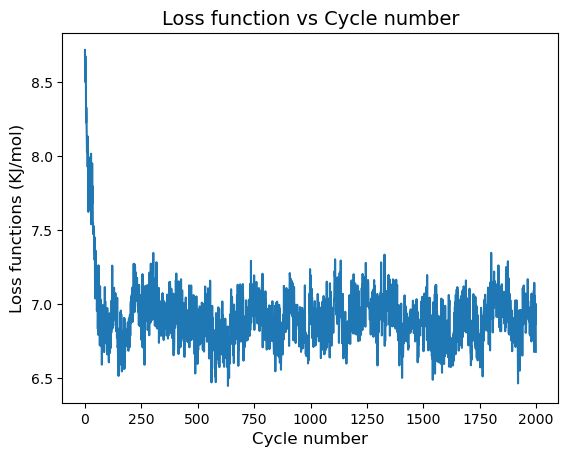

In [31]:
fz = 12
loss_ls = loss_1_ls[:]
ener_ls = ener_1_ls[:]

print(len(loss_ls), len(ener_ls))
plt.plot([np.sqrt(i) for i in loss_ls])
plt.title("Loss function vs Cycle number", fontsize=fz+2)
plt.ylabel("Loss functions (KJ/mol)",fontsize=fz)
plt.xlabel("Cycle number",fontsize=fz)

2000 2000


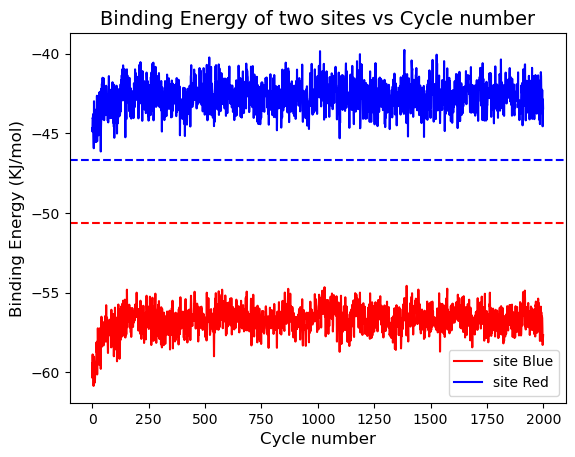

In [34]:
loss_ls = loss_1_ls[:]
ener_ls = ener_1_ls[:]

print(len(loss_ls), len(ener_ls))
plt.plot([i[0] for i in ener_ls], color="red",label="site Blue")
plt.plot([i[1] for i in ener_ls], color='blue',label="site Red")
# Add horizontal lines
plt.axhline(y=target_site1, color='red', linestyle='--')
plt.axhline(y=target_site2, color='blue', linestyle='--')
plt.ylabel("Binding Energy (KJ/mol)",fontsize=fz)
plt.xlabel("Cycle number",fontsize=fz)
plt.title("Binding Energy of two sites vs Cycle number", fontsize=fz+2)
plt.legend()

In [33]:
loss_2_ls = loss_ls1[:]
ener_2_ls = ener_ls1[:]

232 232


Text(0.5, 0, 'Cycle number')

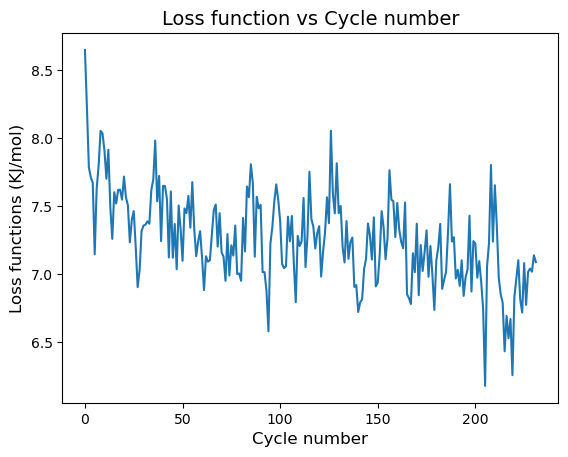

In [79]:
fz = 12
loss_ls = loss_1_ls[:]
ener_ls = ener_1_ls[:]

print(len(loss_ls), len(ener_ls))
plt.plot([np.sqrt(i) for i in loss_ls])
plt.title("Loss function vs Cycle number", fontsize=fz+2)
plt.ylabel("Loss functions (KJ/mol)",fontsize=fz)
plt.xlabel("Cycle number",fontsize=fz)

232 232


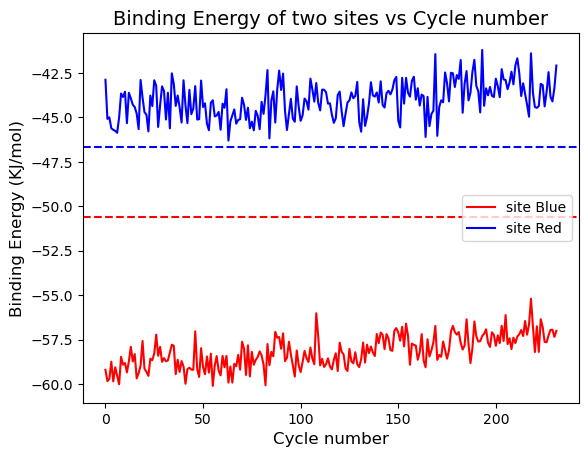

In [80]:
loss_ls = loss_1_ls[:]
ener_ls = ener_1_ls[:]

print(len(loss_ls), len(ener_ls))
plt.plot([i[0] for i in ener_ls], color="red",label="site Blue")
plt.plot([i[1] for i in ener_ls], color='blue',label="site Red")
# Add horizontal lines
plt.axhline(y=target_site1, color='red', linestyle='--')
plt.axhline(y=target_site2, color='blue', linestyle='--')
plt.ylabel("Binding Energy (KJ/mol)",fontsize=fz)
plt.xlabel("Cycle number",fontsize=fz)
plt.title("Binding Energy of two sites vs Cycle number", fontsize=fz+2)
plt.legend()

346 346


Text(0.5, 0, 'Cycle number')

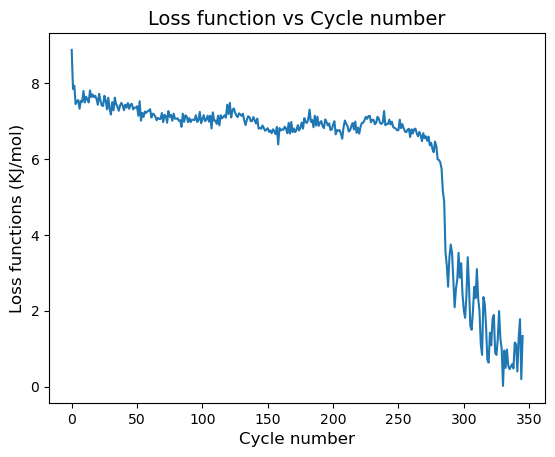

In [34]:
fz = 12
loss_ls = loss_2_ls[:]
ener_ls = ener_2_ls[:]

print(len(loss_ls), len(ener_ls))
plt.plot([np.sqrt(i) for i in loss_ls])
plt.title("Loss function vs Cycle number", fontsize=fz+2)
plt.ylabel("Loss functions (KJ/mol)",fontsize=fz)
plt.xlabel("Cycle number",fontsize=fz)

346 346


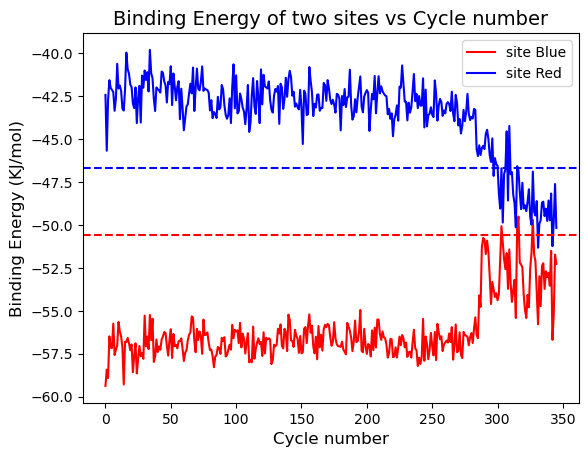

In [35]:
loss_ls = loss_2_ls[:]
ener_ls = ener_2_ls[:]

print(len(loss_ls), len(ener_ls))
plt.plot([i[0] for i in ener_ls], color="red",label="site Blue")
plt.plot([i[1] for i in ener_ls], color='blue',label="site Red")
# Add horizontal lines
plt.axhline(y=target_site1, color='red', linestyle='--')
plt.axhline(y=target_site2, color='blue', linestyle='--')
plt.ylabel("Binding Energy (KJ/mol)",fontsize=fz)
plt.xlabel("Cycle number",fontsize=fz)
plt.title("Binding Energy of two sites vs Cycle number", fontsize=fz+2)
plt.legend()

In [29]:
print(ener_site1,ener_site2)
print(paramset.parameters)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

-56.13679292798042 -42.13830775022507
{'LennardJonesForce': {'epsilon': Array([2.05768074, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
       0.22469   ], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.3547711, 0.34309  , 0.25711  , 0.31181  , 0.305    , 0.28     ],      dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}
Error:  -54.85780200996204
Error:  -40.52921607602615


In [40]:
print(ener_site1,ener_site2)
print(paramset.parameters)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

-55.651949852705 -42.92072430253029
{'LennardJonesForce': {'epsilon': Array([1.71981396, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
       0.22469   ], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}
Error:  -55.66002789513662
Error:  -42.75266434304113


In [59]:
import optax
optimizer = optax.adam(0.03)
opt_state = optimizer.init(paramset)
#print(paramset.parameters)

path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 500

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls0.append(v)
    ener_ls0.append([ener_site1, ener_site2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<40:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

KeyboardInterrupt: 

In [54]:
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)

Error:  0.5181541676505361
Error:  -0.4729582754034567


In [57]:
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)
print(ener_site1, ener_site2)

-57.40719825029373 -42.31727132201195


In [53]:
paramset.parameters

{'LennardJonesForce': {'epsilon': Array([1.69214738, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
         0.22469   ], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [52]:
print(ener_site1, ener_site2)

-57.257406800985336 -42.06769406795502


32 32


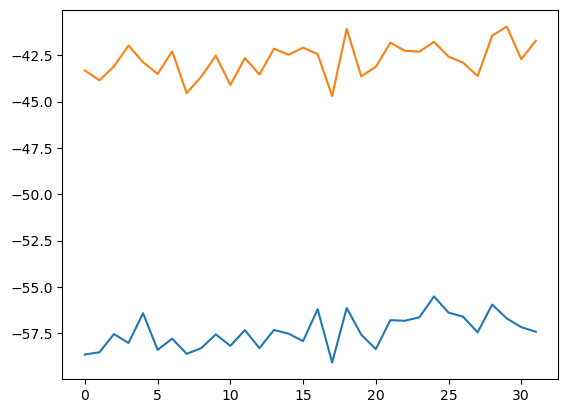

In [60]:
loss_ls = loss_ls0[:]
ener_ls = ener_ls0[:]

print(len(loss_ls), len(ener_ls))
plt.plot([i[0] for i in ener_ls])
plt.plot([i[1] for i in ener_ls])

In [32]:
loss_ls = loss_ls0[:]
ener_ls = ener_ls0[:]

print(len(loss_ls), len(ener_ls))
plt.plot([i[0] for i in ener_ls])
plt.plot([i[1] for i in ener_ls])

-55.651949852705 -42.92072430253029
{'LennardJonesForce': {'epsilon': Array([1.71981396, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
       0.22469   ], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [30]:
print(ener_site1,ener_site2)
print(paramset.parameters)

-53.68930068612099 -43.64450052380562
{'LennardJonesForce': {'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64), 'epsilon': Array([2.11525, 0.43979, 0.18436, 0.25079, 0.65757, 0.22469], dtype=float64), 'sigma_nbfix': Array([], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64)}}


In [35]:
print(ener_site1,ener_site2)
print(paramset.parameters)

-54.7140206694603 -41.67841151356697
{'LennardJonesForce': {'epsilon': Array([1.94972618, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
       0.22469   ], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.40701473, 0.34309   , 0.25711   , 0.31181   , 0.305     ,
       0.28      ], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [30]:
updates.parameters

{'LennardJonesForce': {'epsilon': Array([-0.00230479,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([-0.00034524,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [26]:
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 100

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<2:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  0.6988361797228748
Error:  1.1823140822115903
Loss: 50.060083135699344
Error:  1.72148863094192
Error:  1.7651882587314773
Loss: 49.946148796267266
Error:  1.244167269810383
Error:  0.39499847715251235
Loss: 49.83402560004298
Error:  1.2043851811519062
Error:  1.8060607615608504
Loss: 49.72365992532363
Error:  2.00835930885421
Error:  1.6702788588381594
Loss: 49.61488192179671
Error:  0.5936134342739052
Error:  2.0970102874681658
Loss: 49.50803996360281
Error:  0.05385667562845953
Error:  0.08625282284292268
Loss: 49.40307849427896
Error:  1.3891239316799755
Error:  -0.612030348392075
Loss: 49.29974918707221
Error:  1.0681161434203972
Error:  1.127219341510397
Loss: 49.198634093678095
Error:  1.934591249931799
Error:  1.4758053458410103
Loss: 49.0994028741397
Error:  2.7385609742415653
Error:  3.027501529133133
Loss: 49.0018361618095
Error:  1.2925061816509498
Error:  1.7979184190028832
Loss: 48.90644876780841
Error:  2.9089038794938347
Error:  2.7714431265044936
Loss: 48.81310

In [29]:
optimizer = optax.adam(0.02)
opt_state = optimizer.init(paramset)

In [27]:
loss_ls = []
error_ls = []

In [28]:
optimizer = optax.adam(0.005)
opt_state = optimizer.init(paramset)
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)


os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 1000

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    error1 = compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1
    error2 = compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2
    print("Error: ", error1)
    print("Error: ", error2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls.append(v)
    error_ls.append([error1,error2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    
    if v<2:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  0.6714166523988752
Error:  -0.4474044010228937
Loss: 59.77094523604964
Error:  2.623007763307541
Error:  1.3309933564616259
Loss: 59.682767866355356
Error:  1.699620542137822
Error:  1.2344038355955433
Loss: 59.59511650492204
Error:  2.4012341520279676
Error:  1.2159466237187928
Loss: 59.50827585674918
Error:  0.6653582458337155
Error:  0.5412526972136362
Loss: 59.42197599339347
Error:  0.2732677077130603
Error:  -0.16468327262513327
Loss: 59.336372223569995
Error:  1.2561572952097464
Error:  1.1918982703726044
Loss: 59.25153585030482
Error:  1.520313301816529
Error:  1.1109652929264726
Loss: 59.16721836544349
Error:  2.1282109706239467
Error:  2.9831715893813566
Loss: 59.083782454074374
Error:  1.6736289462146487
Error:  0.9647349001557046
Loss: 59.00084914147847
Error:  1.2502733811704871
Error:  0.649449337463686
Loss: 58.918899595460886
Error:  0.23316909604529457
Error:  -0.8064749663247
Loss: 58.83759451219896
Error:  0.9348294655103899
Error:  -0.4811494597993047
Loss: 5

In [29]:
optimizer = optax.adam(0.018)
opt_state = optimizer.init(paramset)
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)


os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 1000

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    error1 = compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1
    error2 = compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2
    print("Error: ", error1)
    print("Error: ", error2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls.append(v)
    error_ls.append([error1,error2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    
    if v<2:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  2.144307977565795
Error:  1.483641916704265
Loss: 42.978437393090516
Error:  1.6520689437514235
Error:  0.6177044384591213
Loss: 42.80680151572248
Error:  1.0977967725480937
Error:  0.6115903004974115
Loss: 42.64809525581934
Error:  2.5440670308059694
Error:  1.3404070761363727
Loss: 42.50239094304596
Error:  1.147247240388424
Error:  1.0073527301680585
Loss: 42.3694810273407
Error:  0.9074511446286522
Error:  -0.6218061970674142
Loss: 42.24938717059673
Error:  2.07482287513222
Error:  0.3280334372796432
Loss: 42.1416347970138
Error:  1.211945282279082
Error:  1.3101107102148077
Loss: 42.046189185437555
Error:  1.7252229828306724
Error:  1.3245692933185893
Loss: 41.962304764174085
Error:  0.2710550541460748
Error:  0.30905510210428844
Loss: 41.88997020288362
Error:  1.193337946000824
Error:  0.7324495067101964
Loss: 41.82814189162919
Error:  0.46097907576549346
Error:  -0.21760533928325287
Loss: 41.776581507731365
Error:  1.855356520422177
Error:  0.6309285774095272
Loss: 41.73

KeyboardInterrupt: 

In [ ]:
optimizer = optax.adam(0.018)
opt_state = optimizer.init(paramset)
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)


os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 1000

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    error1 = compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1
    error2 = compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2
    print("Error: ", error1)
    print("Error: ", error2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    loss_ls.append(v)
    error_ls.append([error1,error2])
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    
    if v<2:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

In [31]:
optimizer = optax.adam(0.03)
opt_state = optimizer.init(paramset)
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 100

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

for nloop in range(1, loop_time+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    #print(paramset.mask)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<2:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  1.1503729867050652
Error:  0.048244870297352804
Loss: 53.25438693521793
Error:  1.490512120860771
Error:  0.39554917188915795
Loss: 53.04712170312666
Error:  1.3933567279978405
Error:  0.336810428529418
Loss: 52.86911949305299
Error:  1.0146854344185954
Error:  -0.3315546781916723
Loss: 52.721103601756525
Error:  0.041291918758886936
Error:  -1.6101651113263458
Loss: 52.60414438533793
Error:  1.7222941631409867
Error:  0.7032659975049427
Loss: 52.51720977478918
Error:  0.9626971040569146
Error:  -0.7517204888327385
Loss: 52.45979504227619
Error:  -0.2701801009348159
Error:  -0.6170533605680006
Loss: 52.42927236153419
Error:  1.2719126650204515
Error:  0.8244217035711614
Loss: 52.42166707000175
Error:  2.1183984417851462
Error:  1.5710396785328626
Loss: 52.43126721134212
Error:  2.0175024881681978
Error:  0.027451092682497347
Loss: 52.45145297869685
Error:  1.4678699627642544
Error:  -0.08882798910082101
Loss: 52.47558743408297
Error:  1.2499710608176855
Error:  1.01838790329853

In [32]:
print(ener_site1,ener_site2)
print(paramset.parameters)

-55.11214831471443 -42.605300307273865
{'LennardJonesForce': {'epsilon': Array([1.8614317, 0.43979  , 0.18436  , 0.25079  , 0.65757  , 0.22469  ],      dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [35]:
print(ener_site1,ener_site2)
print(paramset.parameters)

-56.43994715809822 -43.55597683787346
{'LennardJonesForce': {'epsilon': Array([2.52969352, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
       0.22469   ], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [30]:
print(ener_site1,ener_site2)
print(paramset.parameters)

-56.358377903699875 -43.33954527974129
{'LennardJonesForce': {'epsilon': Array([1.83134577, 0.43979   , 0.18436   , 0.25079   , 0.65757   ,
       0.22469   ], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [35]:
for nloop in range(1, 20+1):
    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
    #site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters

    updates, opt_state = optimizer.update(g, opt_state)
    updates.parameters = update_mask(updates.parameters,paramset.mask)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    if v<2:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  6.041683048893496
Error:  -5.335105977110999
Loss: 0.23873661499090026
[{'name': 'Atom', 'attrib': {'epsilon': '0.8521059035634801', 'sigma': '0.5949322415601603', 'type': 'Al'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.43979', 'sigma': '0.34309', 'type': 'C', 'mask': 'True'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.18436', 'sigma': '0.25711', 'type': 'H', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.25079', 'sigma': '0.31181', 'type': 'O', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.65757', 'sigma': '0.305', 'type': 'O_co2', 'mask': 'true'}}, {'name': 'Atom', 'attrib': {'epsilon': '0.22469', 'sigma': '0.28', 'type': 'C_co2', 'mask': 'true'}}]
-47.34038531014456
-46.80813470089378
Error:  2.9054464178370054
Error:  4.352152321696856
Loss: 10.639042832594948
Error:  2.6769619982518194
Error:  2.5736249627480277
Loss: 11.8173039333139
Error:  3.6559575193448524
Error:  3.1294604430488704
Loss: 4.305173072827947
Error:  2.355830308449555
Error: 

In [29]:
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 100

site1_pos = runMD(os.path.join(path,f"site1-0.pdb"),ff)
site2_pos = runMD(os.path.join(path,f"site2-0.pdb"),ff)

nloop = 1

xmlio = XMLIO()
xmlio.loadXML(os.path.join(path,f"try-{nloop-1}.xml"))
ffinfo = xmlio.parseXML()
paramset0 = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset0)


ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
#print("Energy Minization on site 1 and 2")
#site1_pos = runMD(os.path.join(path,f"site1-{nloop-1}.pdb"),ff)
#site2_pos = runMD(os.path.join(path,f"site2-{nloop-1}.pdb"),ff)
# compute binding Energy
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)
refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
print("This is right value:",ener_site1,ener_site2)
print("This is wrong value:")
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
def loss(params):
    error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
    error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
    return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
v_and_g = jax.value_and_grad(loss, 0)
v, g = v_and_g(paramset)
print("Loss:", v)
    
# update parameters
updates, opt_state = optimizer.update(g, opt_state)
updates.parameters = update_mask(updates.parameters,paramset.mask)
paramset = optax.apply_updates(paramset, updates)
paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
# upate ffinfo



This is right value: -56.469220370054245 -44.50552251935005
This is wrong value:
Error:  -56.05397410938462
Error:  -43.60859229703843
Loss: 39.24090701770863


In [ ]:
lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
#write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
write_xml(lj_gen.ffinfo, os.path.join(path,f"try-{nloop}.xml"))
if (ener_site1-target_site1)**2+(ener_site2-target_site2)**2<2:
    print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

In [21]:
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)

print(ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site2)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

-56.212047308683395
Error:  -50.8722210727806
-43.445243418216705
Error:  -46.605650793172465


In [37]:
lj_gen.ffinfo["Forces"]["LennardJonesForce"]

{'meta': {'lj14scale': '1.0'},
 'node': [{'name': 'Atom',
   'attrib': {'epsilon': '2.1677228043828407',
    'sigma': '0.40082',
    'type': 'Al'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.43979',
    'sigma': '0.34309',
    'type': 'C',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.18436',
    'sigma': '0.25711',
    'type': 'H',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.25079',
    'sigma': '0.31181',
    'type': 'O',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.65757',
    'sigma': '0.305',
    'type': 'O_co2',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.22469',
    'sigma': '0.28',
    'type': 'C_co2',
    'mask': 'True'}}]}

In [23]:
rewrite_xml(lj_gen.ffinfo, "test.xml")
write_xml(lj_gen.ffinfo, "try.xml")

In [34]:
xmlio = XMLIO()
xmlio.loadXML("try.xml")
ffinfo = xmlio.parseXML()
paramset1 = ParamSet()
lj_gen_new = LennardJonesGenerator(ffinfo, paramset1)


pdb = app.PDBFile("loading_supercell.pdb")
positions = pdb.getPositions()

ff_new = app.ForceField("test.xml")
ener_site1 = binding_energy(topodata, positions, ff_new)
refer_site1 = binding_energy(topodata, positions, ff, removeLJ=True)

print(ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, positions, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site1)

-43.181274592876434
Error:  -46.0129148008374


In [35]:
ff_new = app.ForceField("test.xml")
ener_site1 = binding_energy(topodata, site1_pos, ff_new)
ener_site2 = binding_energy(topodata, site2_pos, ff_new)
refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
print(ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site2)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site2)

-56.212035804986954
Error:  -50.87222488747786
-43.44524723291397
Error:  -46.60565460786973


In [ ]:
xmlio = XMLIO()
xmlio.loadXML("try.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
pdb = app.PDBFile("loading_supercell.pdb")
positions = pdb.getPositions()
print(compute_energy_dmff(paramset,pdb.topology, positions, lj_gen, cutoff=cutoff))
print(compute_binding_energy(paramset,pdb.topology, positions, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)

pdb = app.PDBFile("loading_supercell.pdb")
#pdb = app.PDBFile("scaled_frame.pdb")
ff = app.ForceField("test.xml")
gas_topo,frame_topo = cutoff_topology(pdb.topology)
#
total_ener = compute_energy(pdb.topology,positions,ff,cutoff=cutoff)-compute_energy(pdb.topology,positions,ff,cutoff=cutoff,removeLJ=True)
#print(frame_topo, gas_topo,len(positions[:-3]))
frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff)-compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff,removeLJ=True)
gas_ener = compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff)-compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff,removeLJ=True)
print(total_ener-frame_ener-gas_ener+refer_site1)
#compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)

In [24]:
xmlio = XMLIO()
xmlio.loadXML("try.xml")
ffinfo = xmlio.parseXML()
paramset1 = ParamSet()
lj_gen_new = LennardJonesGenerator(ffinfo, paramset1)


In [25]:
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  -50.8722210727806
Error:  -46.605650793172465


In [26]:
ener_site1 = binding_energy(topodata, site1_pos, ff)
ener_site2 = binding_energy(topodata, site2_pos, ff)
print(ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site2)
print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

-57.9048912525177
Error:  -50.31391092109311
-43.13500517606735
Error:  -46.991100203105056


In [37]:
cutoff

1.3

In [51]:
new_cutoff = 1.43

red_pos = app.PDBFile("data/site1_supercell.pdb").getPositions()
blue_pos = app.PDBFile("data/site2_supercell.pdb").getPositions()
ener_site1 = binding_energy(topodata, red_pos, ff, cutoff=new_cutoff)
ener_site2 = binding_energy(topodata, blue_pos , ff, cutoff=new_cutoff)
refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True, cutoff=new_cutoff)
refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True, cutoff=new_cutoff)
print(ener_site1)
print("Error: ",compute_binding_energy(paramset,topodata, red_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site2)
print("Error: ",compute_binding_energy(paramset,topodata, blue_pos , lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

-57.44171646237373
Error:  -48.776552224522945
-46.64840218424797
Error:  -48.868623750105264


In [47]:
binding_energy(topodata, blue_pos , ff,cutoff=1.43)

-46.6484098136425

In [41]:
print("Error: ",compute_binding_energy(paramset,topodata, blue_pos , lj_gen, numframe=1920,cutoff=1.3)+refer_site2)

Error:  -46.81985239107883


In [53]:
paramset.parameters

{'LennardJonesForce': {'epsilon': Array([2.10573633, 0.41736552, 0.15523719, 0.25992135, 0.6451942 ,
         0.20264864], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([0.39790579, 0.34734142, 0.21442431, 0.36739237, 0.28080769,
         0.28046279], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [35]:
for num in range(45,50):
    red_pos = app.PDBFile(os.path.join(path,f"site1-{num}.pdb")).getPositions()
    blue_pos = app.PDBFile(os.path.join(path,f"site2-{num}.pdb")).getPositions()
    ener_site1 = binding_energy(topodata, red_pos, ff)
    ener_site2 = binding_energy(topodata, blue_pos , ff)
    print(ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, red_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
    print(ener_site2)
    print("Error: ",compute_binding_energy(paramset,topodata, blue_pos , lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

-57.84195628762245
Error:  -50.30959728557804
-43.07255160808563
Error:  -46.99055610645759
-57.84196773171425
Error:  -50.30959728557804
-43.07254779338837
Error:  -46.99055610645759
-57.84197536110878
Error:  -50.30959728557804
-43.07255160808563
Error:  -46.99055610645759
-57.84197536110878
Error:  -50.30959728557804
-43.07254013419151
Error:  -46.99055610645759
-57.841971546411514
Error:  -50.30959728557804
-43.0725439786911
Error:  -46.99055610645759


In [41]:
path = "process_file/"
if not os.path.exists(path):
    os.makedirs(path)

os.system("cp data/site1_supercell.pdb "+os.path.join(path,"site1-0.pdb"))
os.system("cp data/site2_supercell.pdb "+os.path.join(path,"site2-0.pdb"))
os.system("cp data/custom_forcefield.xml "+os.path.join(path,"init-0.xml"))
os.system("cp data/init.xml "+os.path.join(path,f"try-0.xml"))
loop_time = 100


for nloop in range(1, loop_time+1):
    '''
    xmlio = XMLIO()
    xmlio.loadXML(os.path.join(path,f"try-{nloop-1}.xml"))
    ffinfo = xmlio.parseXML()
    paramset = ParamSet()
    lj_gen = LennardJonesGenerator(ffinfo, paramset)
    '''

    ff = app.ForceField(os.path.join(path,f"init-{nloop-1}.xml"))
    #print("Energy Minization on site 1 and 2")
    site1_pos = app.PDBFile(os.path.join(path,"site1-0.pdb")).getPositions()
    site2_pos = app.PDBFile(os.path.join(path,"site2-0.pdb")).getPositions()
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print("Error: ",compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1)
    print("Error: ",compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-ener_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters
    updates, opt_state = optimizer.update(g, opt_state)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update
    #write_xml(lj_gen, os.path.join(path, f"init-{nloop}.pdb"))    
    app.PDBFile.writeFile(topodata, site1_pos, open(os.path.join(path,f"site1-{nloop}.pdb"), 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(os.path.join(path,f"site2-{nloop}.pdb"), 'w'))
    rewrite_xml(lj_gen.ffinfo, os.path.join(path,f"init-{nloop}.xml"), os.path.join(path,f"init-{nloop-1}.xml"))
    write_xml(lj_gen.ffinfo, os.path.join(path,f"try-{nloop}.xml"))
    if v<3:
        print(lj_gen.ffinfo["Forces"][lj_gen.name]["node"])
        print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
        print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)

Error:  1.8084089861938537
Error:  1.1138807676419162
Loss: 53.56661221970735


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [35]:
xmlio = XMLIO()
xmlio.loadXML(f"try.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen_new = LennardJonesGenerator(ffinfo, paramset)

In [28]:
write_xml(lj_gen.ffinfo, "try.xml")

In [40]:
frame_topo

<Topology; 1 chains, 48 residues, 1920 atoms, 0 bonds>

In [41]:
gas_topo

<Topology; 1 chains, 1 residues, 3 atoms, 2 bonds>

In [42]:
len(site1_pos)

1923

In [45]:
compute_energy_dmff(paramset,topodata, site1_pos, lj_gen,cutoff=cutoff)-compute_energy_dmff(paramset,frame_topo,positions, lj_gen,cutoff=cutoff)+refer_site1

Array(-56.76027128, dtype=float64)

In [53]:
lj_gen.ffinfo["Forces"]['LennardJonesForce']

{'meta': {'lj14scale': '1.0'},
 'node': [{'name': 'Atom',
   'attrib': {'epsilon': '2.1086606711002744',
    'sigma': '0.40082',
    'type': 'Al'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.43979',
    'sigma': '0.34309',
    'type': 'C',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.18436',
    'sigma': '0.25711',
    'type': 'H',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.25079',
    'sigma': '0.31181',
    'type': 'O',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.65757',
    'sigma': '0.305',
    'type': 'O_co2',
    'mask': 'True'}},
  {'name': 'Atom',
   'attrib': {'epsilon': '0.22469',
    'sigma': '0.28',
    'type': 'C_co2',
    'mask': 'True'}}]}

In [36]:
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site1)
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)

-56.76027127319406
-56.76027127319406


In [48]:
ff = app.ForceField("test.xml")
ener_site1 = binding_energy(topodata, site1_pos, ff)
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen_new, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site1)

-56.76027127319406
-59.27182728052139


In [26]:
compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-ener_site1

Array(8.17056114, dtype=float64)

In [38]:
ener_site1 = binding_energy(topodata, site1_pos, ff)
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site1)

-56.76027127319406
-59.27182728052139


In [39]:
rewrite_xml(lj_gen.ffinfo, "test.xml")
ff = app.ForceField("test.xml")
ener_site1 = binding_energy(topodata, site1_pos, ff)
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site1)

-56.76027127319406
-59.27183109521866


In [39]:
rewrite_xml(lj_gen.ffinfo, "test.xml")
ff = app.ForceField("test.xml")
ener_site1 = binding_energy(topodata, site1_pos, ff)
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(ener_site1)

-57.744442912871484
-58.64385426044464


In [41]:
type(lj_gen)

dmff.generators.classical.LennardJonesGenerator

In [40]:
lj_gen.ffinfo

{'Operators': {},
 'AtomTypes': [],
 'Residues': [],
 'Forces': {'LennardJonesForce': {'meta': {'lj14scale': '1.0'},
   'node': [{'name': 'Atom',
     'attrib': {'epsilon': '2.11525', 'sigma': '0.40082', 'type': 'Al'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.43979',
      'sigma': '0.34309',
      'type': 'C',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.18436',
      'sigma': '0.25711',
      'type': 'H',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.25079',
      'sigma': '0.31181',
      'type': 'O',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.65757',
      'sigma': '0.305',
      'type': 'O_co2',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.22469',
      'sigma': '0.28',
      'type': 'C_co2',
      'mask': 'True'}}]}},
 'ClassToType': {}}

In [35]:
lj_gen.ffinfo

{'Operators': {},
 'AtomTypes': [],
 'Residues': [],
 'Forces': {'LennardJonesForce': {'meta': {'lj14scale': '1.0'},
   'node': [{'name': 'Atom',
     'attrib': {'epsilon': '2.101736951285485',
      'sigma': '0.40082',
      'type': 'Al'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.43979',
      'sigma': '0.34309',
      'type': 'C',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.18436',
      'sigma': '0.25711',
      'type': 'H',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.25079',
      'sigma': '0.31181',
      'type': 'O',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.65757',
      'sigma': '0.305',
      'type': 'O_co2',
      'mask': 'True'}},
    {'name': 'Atom',
     'attrib': {'epsilon': '0.22469',
      'sigma': '0.28',
      'type': 'C_co2',
      'mask': 'True'}}]}},
 'ClassToType': {}}

In [31]:
compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)

Array(-35.63334149, dtype=float64)

In [27]:
compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1

Array(-50.87954309, dtype=float64)

In [39]:
xmlio = XMLIO()
xmlio.loadXML("data/init.xml")
ffinfo = xmlio.parseXML()
paramset = ParamSet()
lj_gen = LennardJonesGenerator(ffinfo, paramset)
ff = app.ForceField("custom_forcefield.xml")

In [48]:
ff = app.ForceField("custom_forcefield.xml")
os.system("cp data/site1_supercell.pdb site1-0.pdb")
os.system("cp data/site2_supercell.pdb site2-0.pdb")
for nloop in range(1, loop_time+1):

    #print("Energy Minization on site 1 and 2")
    site1_pos = app.PDBFile("site1-0.pdb").getPositions()
    site2_pos = app.PDBFile("site2-0.pdb").getPositions()
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print(f"Binding Energy: {ener_site1}(LJ) {target_site1} (DFT)")
    print(f"Binding Energy: {ener_site2}(LJ) {target_site2} (DFT)")
    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2)
    break

Binding Energy: -58.845978289842606(LJ) -50.6 (DFT)
Binding Energy: -44.321899592876434(LJ) -46.69 (DFT)
-58.02718321172436
-43.732898181788386
-7.427183211724362
2.957101818211612


In [47]:
rewrite_xml(lj_gen.ffinfo, "test.xml")
ff = app.ForceField("test.xml")
os.system("cp data/site1_supercell.pdb site1-0.pdb")
os.system("cp data/site2_supercell.pdb site2-0.pdb")
for nloop in range(1, loop_time+1):

    #print("Energy Minization on site 1 and 2")
    site1_pos = app.PDBFile("site1-0.pdb").getPositions()
    site2_pos = app.PDBFile("site2-0.pdb").getPositions()
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print(f"Binding Energy: {ener_site1}(LJ) {target_site1} (DFT)")
    print(f"Binding Energy: {ener_site2}(LJ) {target_site2} (DFT)")
    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2)
    break

Binding Energy: -58.84598591923714(LJ) -50.6 (DFT)
Binding Energy: -44.32189577817917(LJ) -46.69 (DFT)
-58.027183226625525
-43.73288292299932
-7.427183226625523
2.9571170770006745


Binding Energy: -58.84599354863167(LJ) -50.6 (DFT)
Binding Energy: -44.321899592876434(LJ) -46.69 (DFT)
-58.02718704132279
-43.73288673769659
-7.427187041322789
2.957113262303409


In [44]:
o

Binding Energy: -56.77494040131569(LJ) -50.6 (DFT)
Binding Energy: -44.52180075645447(LJ) -46.69 (DFT)
-56.22268258101643
-43.36908738061632
-5.622682581016427
3.3209126193836767


In [26]:
print(ener_site1,ener_site2)

-58.483384758234024 -42.95283615589142


In [33]:
ener_site1-refer_site1

-43.038685798761435

In [34]:
ener_site2-refer_site2

-37.038292884943075

In [30]:
compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)

Array(-37.5071094, dtype=float64)

In [31]:
compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)

Array(-33.67995956, dtype=float64)

In [29]:
compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2

Array(3.26834733, dtype=float64)

In [28]:
v

Array(5.36542948, dtype=float64)

In [27]:
0.39922727003641706*10

3.9922727003641705

In [ ]:
os.system("cp data/site1_supercell.pdb site1-0.pdb")
os.system("cp data/site2_supercell.pdb site2-0.pdb")
for nloop in range(1, loop_time+1):

    #print("Energy Minization on site 1 and 2")
    site1_pos = runMD(f"site1-{nloop-1}.pdb",ff)
    site2_pos = runMD(f"site2-{nloop-1}.pdb",ff)
    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    #print(f"Binding Energy: {ener_site1}(LJ) {target_site1} (DFT)")
    #print(f"Binding Energy: {ener_site2}(LJ) {target_site2} (DFT)")
    #print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
    #print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
    #print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1)
    #print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2)
    def loss(params):
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    #print(paramset.parameters)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters
    updates, opt_state = optimizer.update(g, opt_state)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    # upate ffinfo
    lj_gen.overwrite(paramset) # I change overwrite function to ensure the mask paramset will be ignore in update    
    app.PDBFile.writeFile(topodata, site1_pos, open(f"site1-{nloop}.pdb", 'w'))
    app.PDBFile.writeFile(topodata, site2_pos, open(f"site2-{nloop}.pdb", 'w'))

Loss: 28.798544531351734
Loss: 28.515140407171042
Loss: 29.560213523206855
Loss: 25.21695322462667
Loss: 24.451549346499124
Loss: 23.17401615723937
Loss: 21.284665832621858
Loss: 21.18721766870025


KeyboardInterrupt: 

In [ ]:
self = lj_gen
for nnode in range(len(self.ffinfo["Forces"][self.name]["node"])):
    node = self.ffinfo["Forces"][self.name]["node"][nnode]
    #print(node)
    if node["name"] == "Atom":
        if 'mask' in node["attrib"].keys() and node["attrib"]["mask"]:
            continue
        print(node)
        if "type" in node["attrib"]:
            atype = node["attrib"]["type"]
            idx = self.atype_to_idx[atype]

        elif "class" in node["attrib"]:
            acls = node["attrib"]["class"]
            atypes = self.ffinfo["ClassToType"][acls]
            idx = self.atype_to_idx[atypes[0]]

        eps_now = paramset[self.name]["epsilon"][idx]
        sig_now = paramset[self.name]["sigma"][idx]
        self.ffinfo["Forces"][
            self.name]["node"][nnode]["attrib"]["sigma"] = sig_now
        self.ffinfo["Forces"][
            self.name]["node"][nnode]["attrib"]["epsilon"] = eps_now
    # have not tested for NBFixPair overwrite
    elif node["name"] == "NBFixPair":
        if "type1" in node["attrib"]:
            atype1, atype2 = node["attrib"]["type1"], node["attrib"]["type2"]
            idx = self.nbfix_to_idx[atype1][atype2]
        elif "class1" in node["attrib"]:
            acls1, acls2 = node["attrib"]["class1"], node["attrib"]["class2"]
            atypes1 = self.ffinfo["ClassToType"][acls1]
            atypes2 = self.ffinfo["ClassToType"][acls2]
            idx = self.nbfix_to_idx[atypes1[0]][atypes2[0]]
        sig_now = paramset[self.name]["sigma_nbfix"][idx]
        eps_now = paramset[self.name]["epsilon_nbfix"][idx]
        self.ffinfo["Forces"][self.name]["node"][nnode]["attrib"]["sigma"] = sig_now
        self.ffinfo["Forces"][self.name]["node"][nnode]["attrib"]["epsilon"] = eps_now

{'name': 'Atom', 'attrib': {'epsilon': Array(2.11325381, dtype=float64), 'sigma': Array(0.39882424, dtype=float64), 'type': 'Al'}}


In [ ]:
120.27311595710411*2.11325381

254.16762053692204

In [ ]:
paramset.parameters

{'LennardJonesForce': {'epsilon': Array([2.11325565, 0.43779538, 0.18236368, 0.2487974 , 0.65557567,
         0.22269509], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([0.39882601, 0.34109481, 0.25511049, 0.31381029, 0.30300438,
         0.27800648], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [ ]:
os.system("cp data/site1_supercell.pdb site1-0.pdb")
os.system("cp data/site2_supercell.pdb site2-0.pdb")

for nloop in range(1, loop_time+1):

    print("Energy Minization on site 1 and 2")
    #site1_pos = runMD(f"site1-{nloop-1}.pdb",ff)
    #site2_pos = runMD(f"site2-{nloop-1}.pdb",ff)
    site1_pos = runMD(f"site1-0.pdb",ff)
    site2_pos = runMD(f"site2-0.pdb",ff)

    # compute binding Energy
    ener_site1 = binding_energy(topodata, site1_pos, ff)
    ener_site2 = binding_energy(topodata, site2_pos, ff)
    refer_site1 = binding_energy(topodata, site1_pos, ff, removeLJ=True)
    refer_site2 = binding_energy(topodata, site2_pos, ff, removeLJ=True)
    print(f"Binding Energy: {ener_site1}(LJ) {target_site1} (DFT)")
    print(f"Binding Energy: {ener_site2}(LJ) {target_site2} (DFT)")

    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
    print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1)
    print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2)
    #print(rerun_dmff(paramset,topodata, site1_pos, ffinfo, numframe=1920,cutoff=cutoff)+refer_site1)
    #print(rerun_dmff(paramset,topodata, site1_pos, ffinfo, numframe=1920,cutoff=cutoff)+refer_site2)
    def loss(params):
        #error_jax_site1 = rerun_dmff(paramset,topodata, site1_pos, ffinfo, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        #error_jax_site2 = rerun_dmff(paramset,topodata, site1_pos, ffinfo, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        error_jax_site1 = compute_binding_energy(params,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1
        error_jax_site2 = compute_binding_energy(params,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2
        return  jnp.power(error_jax_site1, 2)+jnp.power(error_jax_site2, 2)
    v_and_g = jax.value_and_grad(loss, 0)
    #print(paramset.parameters)
    v, g = v_and_g(paramset)
    print("Loss:", v)
        
    # update parameters
    updates, opt_state = optimizer.update(g, opt_state)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    
    # upate ffinfo
    lj_gen.overwrite(paramset)
    #prmop.overwriteLennardJones(prm_top, lj_gen.ffinfo)
    #prm_top.save(f"loop-{nloop}.top")

In [40]:
def loss(params):
    error_jax_site1 = compute_binding_energy(params, topodata, site1_pos, lj_gen, numframe=1920, cutoff=cutoff) + refer_site1 - target_site1
    error_jax_site2 = compute_binding_energy(params, topodata, site2_pos, lj_gen, numframe=1920, cutoff=cutoff) + refer_site2 - target_site2
    return jnp.power(error_jax_site1, 2) + jnp.power(error_jax_site2, 2)

# Extract the 'sigma' key from the paramset
sigma_params = paramset.parameters['LennardJonesForce']['sigma']

# Only select the first value for optimization
selected_sigma_params = jax.tree_map(lambda x: x[0], sigma_params)

# Create a new paramset with the selected sigma value
selected_paramset = jax.tree_map(lambda x: {'LennardJonesForce': {'sigma': x}}, selected_sigma_params)

v_and_g = jax.value_and_grad(loss, 0)
v, g = v_and_g(paramset)
print("Loss:", v)

# Update only the first sigma value
updates, opt_state = optimizer.update(g, opt_state)
updated_sigma_params = optax.apply_updates(selected_sigma_params, updates)

# Combine the updated sigma value with the rest of the original sigma values
new_sigma_params = jax.tree_multimap(lambda x, y: jnp.concatenate(([x], y[1:])), updated_sigma_params, sigma_params)

# Update the original paramset with the new sigma values
paramset = jax.tree_map(lambda x: {'LennardJonesForce': {'sigma': x}}, new_sigma_params)

# Clip the updated parameters
paramset = jax.tree_map(lambda x: jax.tree_map(lambda y: jnp.clip(y, 0.0, 1e8), x), paramset)


Loss: 30.588022636862352


TypeError: unsupported operand type(s) for +: 'ArrayImpl' and 'ParamSet'

In [41]:
selected_sigma_params

Array(0.3907852, dtype=float64)

In [42]:
selected_paramset

{'LennardJonesForce': {'sigma': Array(0.3907852, dtype=float64)}}

In [38]:
paramset.parameters

{'LennardJonesForce': {'epsilon': Array([2.10490458, 0.4293946 , 0.17346569, 0.24148492, 0.64733365,
         0.21419201], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([0.3907852 , 0.33291165, 0.24528321, 0.32382315, 0.29449282,
         0.27052052], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [36]:
dic = paramset.parameters['LennardJonesForce']
print(dic['epsilon'])
print(dic['sigma'])

[2.10490458 0.4293946  0.17346569 0.24148492 0.64733365 0.21419201]
[0.3907852  0.33291165 0.24528321 0.32382315 0.29449282 0.27052052]


In [31]:
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1)
print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2)
print(compute_binding_energy(paramset,topodata, site1_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site1-target_site1)
print(compute_binding_energy(paramset,topodata, site2_pos, lj_gen, numframe=1920,cutoff=cutoff)+refer_site2-target_site2)

-53.89409819333544
-42.247372429572046
-3.2940981933354365
4.442627570427952


In [32]:
v

Array(31.86846575, dtype=float64)

In [79]:
g.parameters

{'LennardJonesForce': {'epsilon': Array([ 35.32938206, 215.91701868, 187.35027053, 167.05280128,
         294.60044699, 233.22476755], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([ 778.14327462,  924.43290593, 1150.65189393, -861.59741995,
         1505.8541704 ,  485.77648412], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [81]:
opt_state=optimizer.init(paramset)

In [83]:
optimizer.update(g, opt_state)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
paramset.parameters['LennardJonesForce']

{'sigma': Array([0.40082, 0.34309, 0.25711, 0.31181, 0.305  , 0.28   ], dtype=float64),
 'epsilon': Array([2.11525, 0.43979, 0.18436, 0.25079, 0.65757, 0.22469], dtype=float64),
 'sigma_nbfix': Array([], dtype=float64),
 'epsilon_nbfix': Array([], dtype=float64)}

In [77]:
opt_state

(ScaleByAdamState(count=Array(0, dtype=int32), mu=<dmff.api.paramset.ParamSet object at 0x7f6f1d85fcd0>, nu=<dmff.api.paramset.ParamSet object at 0x7f6f17653d10>),
 EmptyState())

In [68]:
optimizer.update(paramset, opt_state)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [67]:
g.parameters

{'LennardJonesForce': {'epsilon': Array([ 34.97180635, 215.53348736, 189.54294978, 170.53104116,
         295.47503877, 232.22966116], dtype=float64),
  'epsilon_nbfix': Array([], dtype=float64),
  'sigma': Array([ 783.62504564,  920.26651873, 1192.28633713, -784.35821335,
         1619.1115821 ,  492.70810606], dtype=float64),
  'sigma_nbfix': Array([], dtype=float64)}}

In [54]:
v,g

(Array(76.21260107, dtype=float64),
 <dmff.api.paramset.ParamSet at 0x7f6f1733a510>)

In [43]:
print(g.parameters)

{'LennardJonesForce': {'epsilon': Array([ 52.63131065, 319.65039508, 201.91962395, 268.53650703,
       425.38260657, 336.53755805], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([1222.20413156, 1402.44066516,  578.86610898, -940.61246876,
       1504.38573277,  758.51270418], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [50]:
print(g.parameters)

{'LennardJonesForce': {'epsilon': Array([ 37.10229813, 228.92980385, 192.56444347, 187.03458174,
       313.86383689, 245.59088025], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([ 847.3231092 ,  990.93692502, 1135.74999684, -736.19433212,
       1706.59982395,  531.21587501], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [34]:
jnp.power(5, 2)+jnp.power(5, 2)

Array(50, dtype=int64, weak_type=True)

In [199]:
print(g.parameters)

{'LennardJonesForce': {'epsilon': Array([0., 0., 0., 0., 0., 0.], dtype=float64), 'epsilon_nbfix': Array([], dtype=float64), 'sigma': Array([0., 0., 0., 0., 0., 0.], dtype=float64), 'sigma_nbfix': Array([], dtype=float64)}}


In [191]:
print(refer_site2,refer_site1)

-44.63575899600983 -59.35188862681389


In [187]:
reference_no_lj

-44.3219034075737

In [135]:
topodata

<Topology; 1 chains, 49 residues, 1923 atoms, 2 bonds>

In [138]:
binding_energy(topodata, site1_pos, ff)

OpenMMException: Called setPositions() on a Context with the wrong number of positions

In [137]:
len(site1_pos)

1923

In [ ]:

gas_topo,frame_topo = cutoff_topology(pdb.topology)
positions = pdb.getPositions()
loading_reference = compute_energy(pdb.topology,positions,ff,cutoff=cutoff)-compute_energy(pdb.topology,positions,ff,cutoff=cutoff,removeLJ=True)
#print(frame_topo, gas_topo,len(positions[:-3]))
frame_ener = compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff)-compute_energy(frame_topo,positions[:-3],ff,cutoff=cutoff,removeLJ=True)
'''
gas_ener = compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff)-compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff,removeLJ=True)
This result is zero

'''

print(total_ener-frame_ener-gas_ener)
#compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff)-compute_energy(pdb.topology,pdb.getPositions(),ff,cutoff=cutoff,removeLJ=True)

In [33]:
def interaction_no_lj(topo, positions):
    return compute_energy(gas_topo,positions[-3:],ff,cutoff=cutoff,removeLJ=True)

0.0013414387146378972

222791912.354719 0.0013414387146378972 222791956.67527717
222791912.16559798 0.11553342450859601 222791956.67527717


0.3033130168914795

In [49]:
pdb.topology

<Topology; 1 chains, 2 residues, 43 atoms, 2 bonds>

In [ ]:
lbfgs = None
loop_time=1

os.system("cp GMX.top loop-0.top")
Losslist=[]
enthalpy_of_evaporation_list=[]
energy_gas_list=[]
energy_liquid_list=[]
for nloop in range(1, loop_time+1):
    # sample liquid
    print("SAMPLE_liquid")
    try:
        runMD(f"loop-{nloop-1}.top", "liquid.pdb", f"loop-{nloop}.dcd", length=length_step)
    except:
        runMD(f"loop-{nloop-1}.top", "liquid.pdb", f"loop-{nloop}.dcd", length=length_step)
        
    # sample GAs
    print("SAMPLE_GAS")

    try:
        runMD_gas_NVT(f"loop-{nloop-1}.top", "GAS.pdb", f"loop-{nloop}-gas.dcd", length=skip_step+1000)
    except:
        runMD_gas_NVT(f"loop-{nloop-1}.top", "GAS.pdb", f"loop-{nloop}-gas.dcd", length=skip_step+1000)
        
    #重新计算能量   不可微的计算液态能量 、液态不包含LJ势能的能量 、气态能量
    print("RERUN")
    ener = rerun_energy("liquid.pdb", f"loop-{nloop}.dcd", f"loop-{nloop-1}.top", removeLJ=False, skip=skip_step)
    energy_liquid_list.append(ener.mean())
    ener_gas = rerun_energy_gas("GAS.pdb", f"loop-{nloop}-gas.dcd", f"loop-{nloop-1}.top", removeLJ=False, skip=skip_step).mean()
    energy_gas_list.append(ener_gas)
    ener_no_lj = rerun_energy("liquid.pdb", f"loop-{nloop}.dcd", f"loop-{nloop-1}.top", skip=skip_step)
    
    print("ESTIMATOR")
    traj = md.load(f"loop-{nloop}.dcd", top="liquid.pdb")[skip_step:]
    estimator = ReweightEstimator(ener, base_energies=ener_no_lj, volume=traj.unitcell_volumes)
    
    #计算当前蒸发焓
    print("CALC han")
    ener_lquid_now = (ener / particle_number).mean()
    enthalpy_of_evaporation_now = ener_gas - ener_lquid_now + 8.314 * SET_temperature * 0.001
    enthalpy_of_evaporation_list.append(enthalpy_of_evaporation_now)
    with open('enthalpy_of_evaporation_list.txt', 'a') as f:
        f.write("%s\n" % str(enthalpy_of_evaporation_now))
        
    # get loss & grad
    def loss(paramset):
        lj_jax = rerun_dmff_lennard_jones(paramset, "liquid.pdb", f"loop-{nloop}.dcd", lj_force, skip=skip_step)
        weight = estimator.estimate_weight(lj_jax)
        ener_lquid = (weight * ener) / particle_number 
        ener_lquid = ener_lquid.mean()
        enthalpy_of_evaporation = ener_gas - ener_lquid + 8.314*SET_temperature*0.001

        return  jnp.power(enthalpy_of_evaporation - target_han, 2)
    
    v_and_g = jax.value_and_grad(loss, 0)
    v, g = v_and_g(paramset)
    print("Loss:", v)
    Losslist.append(v)
    Losslist_np =jax.device_get(v)
    
    with open('Losslist.txt', 'a') as f:
        f.write("%s\n" % str(Losslist_np))
        
    # update parameters
    updates, opt_state = optimizer.update(g, opt_state)
    paramset = optax.apply_updates(paramset, updates)
    paramset = jax.tree_map(lambda x: jnp.clip(x, 0.0, 1e8), paramset)
    
    # upate ffinfo
    lj_gen.overwrite(paramset)
    prmop.overwriteLennardJones(prm_top, lj_gen.ffinfo)
    prm_top.save(f"loop-{nloop}.top")



In [ ]:
pdb = app.PDBFile("MIL120_loading.pdb")

# Add print statements for debugging
for atom in pdb.topology.atoms():
    continue
    print(f"Atom: {atom.name}, Residue: {atom.residue.name}, Atom Type: {atom.element}")
ff = app.ForceField("custom_forcefield.xml")
system = ff.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=cutoff*unit.nanometer, constraints=None, removeCMMotion=False)
for force in system.getForces():
    if isinstance(force, mm.NonbondedForce):
        print("turn off dispersion correction")
        force.setUseDispersionCorrection(False)
integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
simulation = app.Simulation(pdb.topology, system, integ)
simulation.context.setPositions(pdb.getPositions())
simulation.minimizeEnergy(maxIterations=1000)
simulation.step(200)

This part just for curiosity:
Study on how the cutoff influences on energy computation

In [ ]:
cutoff_arr = np.linspace(0.3,0.999,10)
ls_1 = [compute_energy(pdb.topology,positions,ff, cutoff=i) for i in cutoff_arr]
ls_2 = [compute_energy(frame_topo,positions[:-3],ff, cutoff=i) for i in cutoff_arr]
ls_3 = [compute_energy(gas_topo,positions[-3:],ff, cutoff=i) for i in cutoff_arr]

In [210]:
dmff.DMFFTopology(pdb.topology)

<DMFFTopology; 1 chains, 49 residues, 1923 atoms, 2 bonds>

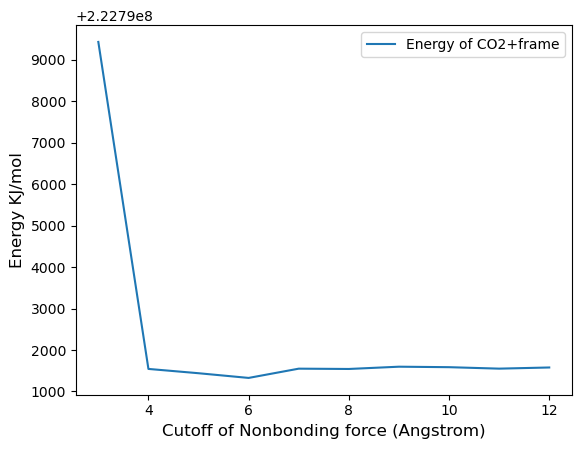

In [101]:
fz = 18
plt.fig = (7,6)

plt.plot(cutoff_arr*10,ls_1,label="Energy of CO2+frame")
plt.xlabel("Cutoff of Nonbonding force (Angstrom)", fontsize=fz-6)
plt.ylabel("Energy KJ/mol", fontsize=fz-6)
plt.legend()

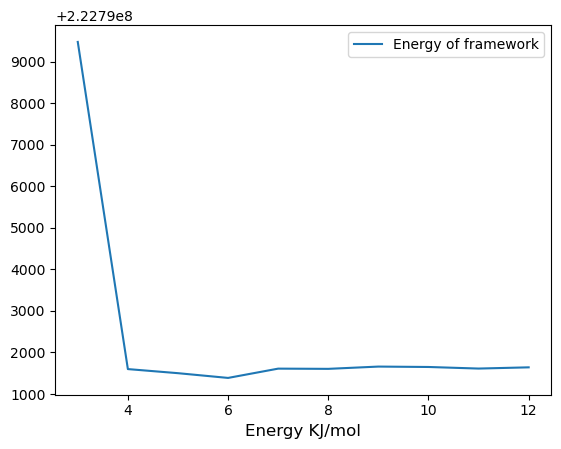

In [98]:
fz = 18
plt.fig = (7,6)

plt.plot(cutoff_arr*10,ls_2,label="Energy of framework")
plt.xlabel("Cutoff of Nonbonding force (Angstrom)", fontsize=fz-6)
plt.xlabel("Energy KJ/mol", fontsize=fz-6)
plt.legend()


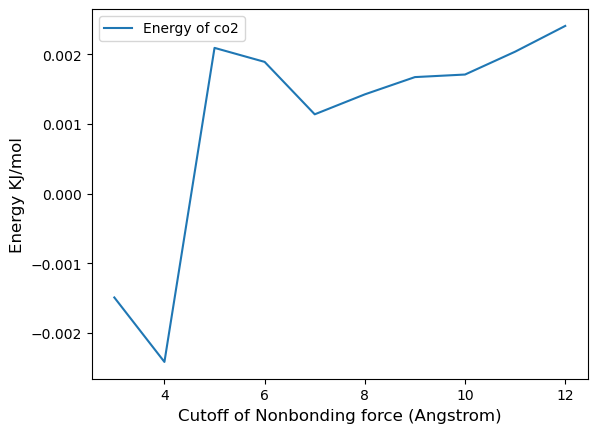

In [97]:
fz = 18
plt.fig = (7,6)

plt.plot(cutoff_arr*10,ls_3,label="Energy of co2")
plt.xlabel("Cutoff of Nonbonding force (Angstrom)", fontsize=fz-6)
plt.ylabel("Energy KJ/mol", fontsize=fz-6)
plt.legend()

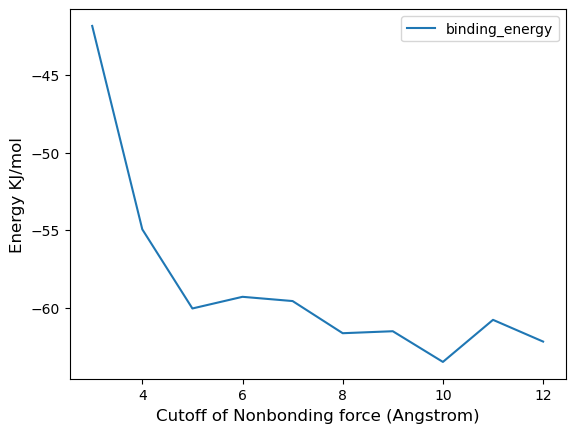

In [102]:
ls_all = [i-j-k for i,j,k in zip(ls_1,ls_2,ls_3)]
plt.plot(cutoff_arr*10,ls_all,label="binding_energy")
plt.xlabel("Cutoff of Nonbonding force (Angstrom)", fontsize=fz-6)
plt.ylabel("Energy KJ/mol", fontsize=fz-6)
plt.legend()

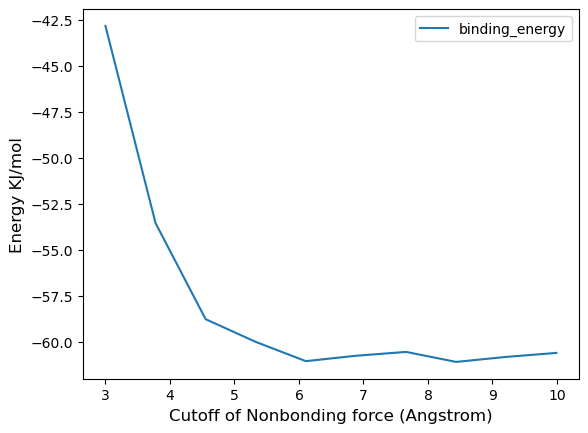

In [108]:

ls_all = [i-j-k for i,j,k in zip(ls_1,ls_2,ls_3)]
plt.plot(cutoff_arr*10,ls_all,label="binding_energy")
plt.xlabel("Cutoff of Nonbonding force (Angstrom)", fontsize=fz-6)
plt.ylabel("Energy KJ/mol", fontsize=fz-6)
plt.legend()

In [3]:
ner_ls = []

positions=initial_positions[:]

topo = pdb.topology
pos = positions[:]
print(len(pos))
integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
simulation = app.Simulation(topo, ff.createSystem(topo, nonbondedMethod=app.PME, nonbondedCutoff=0.356*unit.nanometer, constraints=None, removeCMMotion=False), integ)
simulation.context.setPositions(pos)
state=simulation.context.getState(getEnergy=True)
potential_energy = state.getPotentialEnergy().in_units_of(unit.kilojoules_per_mole)
print(potential_energy)
ener_ls.append(potential_energy)

topo = frame_top
pos = positions[:40]
print(len(pos))
integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
simulation = app.Simulation(topo, ff.createSystem(topo, nonbondedMethod=app.PME, nonbondedCutoff=0.356*unit.nanometer, constraints=None, removeCMMotion=False), integ)
simulation.context.setPositions(pos)
state=simulation.context.getState(getEnergy=True)
potential_energy = state.getPotentialEnergy().in_units_of(unit.kilojoules_per_mole)
print(potential_energy)
ener_ls.append(potential_energy)


topo = gas_top
pos = positions[40:]
print(len(pos))
integ = mm.LangevinIntegrator(SET_temperature*unit.kelvin, 1/unit.picosecond, 2.5*unit.femtosecond)
simulation = app.Simulation(topo, ff.createSystem(topo, nonbondedMethod=app.PME, nonbondedCutoff=0.356*unit.nanometer, constraints=None, removeCMMotion=False), integ)
simulation.context.setPositions(pos)
state=simulation.context.getState(getEnergy=True)
potential_energy = state.getPotentialEnergy().in_units_of(unit.kilojoules_per_mole)
print(potential_energy)
ener_ls.append(potential_energy)

print("This is interaction energy: ", ener_ls[0]-ener_ls[1]-ener_ls[2])